# Проект: определение стоимости автомобилей

**Цель проекта**: построить модель, определяющую стоимость автомобиля на основе исторических данных, которую мы сможем встроить в приложение.

Заказчику важны:

- Качество предсказаний;
- Скорость предсказаний;
- Время обучения модели.

В этом проекте мы будем применять модели, использующие градиентный бустинг. Мы подготовим данные к обучению, обучим модели и проведём сравнительный анализ, чтобы определить, какая модель подходит нам лучше всего.

---

## 1. Первичное изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
# Открываем файл
data = pd.read_csv('../../../autos/datasets/autos.csv')

Воспользуемся функциями из нашего пакета `toads`, которые мы уже написали. Это ускорит процесс и сделает его приятнее.

In [3]:
from toads.eda import first_look

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


--------------------------------------------------
nunique()


DateCrawled          271174
Price                  3731
VehicleType               8
RegistrationYear        151
Gearbox                   2
Power                   712
Model                   250
Kilometer                13
RegistrationMonth        13
FuelType                  7
Brand                    40
NotRepaired               2
DateCreated             109
NumberOfPictures          1
PostalCode             8143
LastSeen             179150
dtype: int64

--------------------------------------------------
describe()


,count,mean,std,min,25%,50%,75%,max,na_part
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0,0.000000
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0,0.000000
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0,0.000000
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0,0.000000
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0,0.000000
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0,0.000000
DateCrawled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
VehicleType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105794
Gearbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055967


--------------------------------------------------
corr()


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


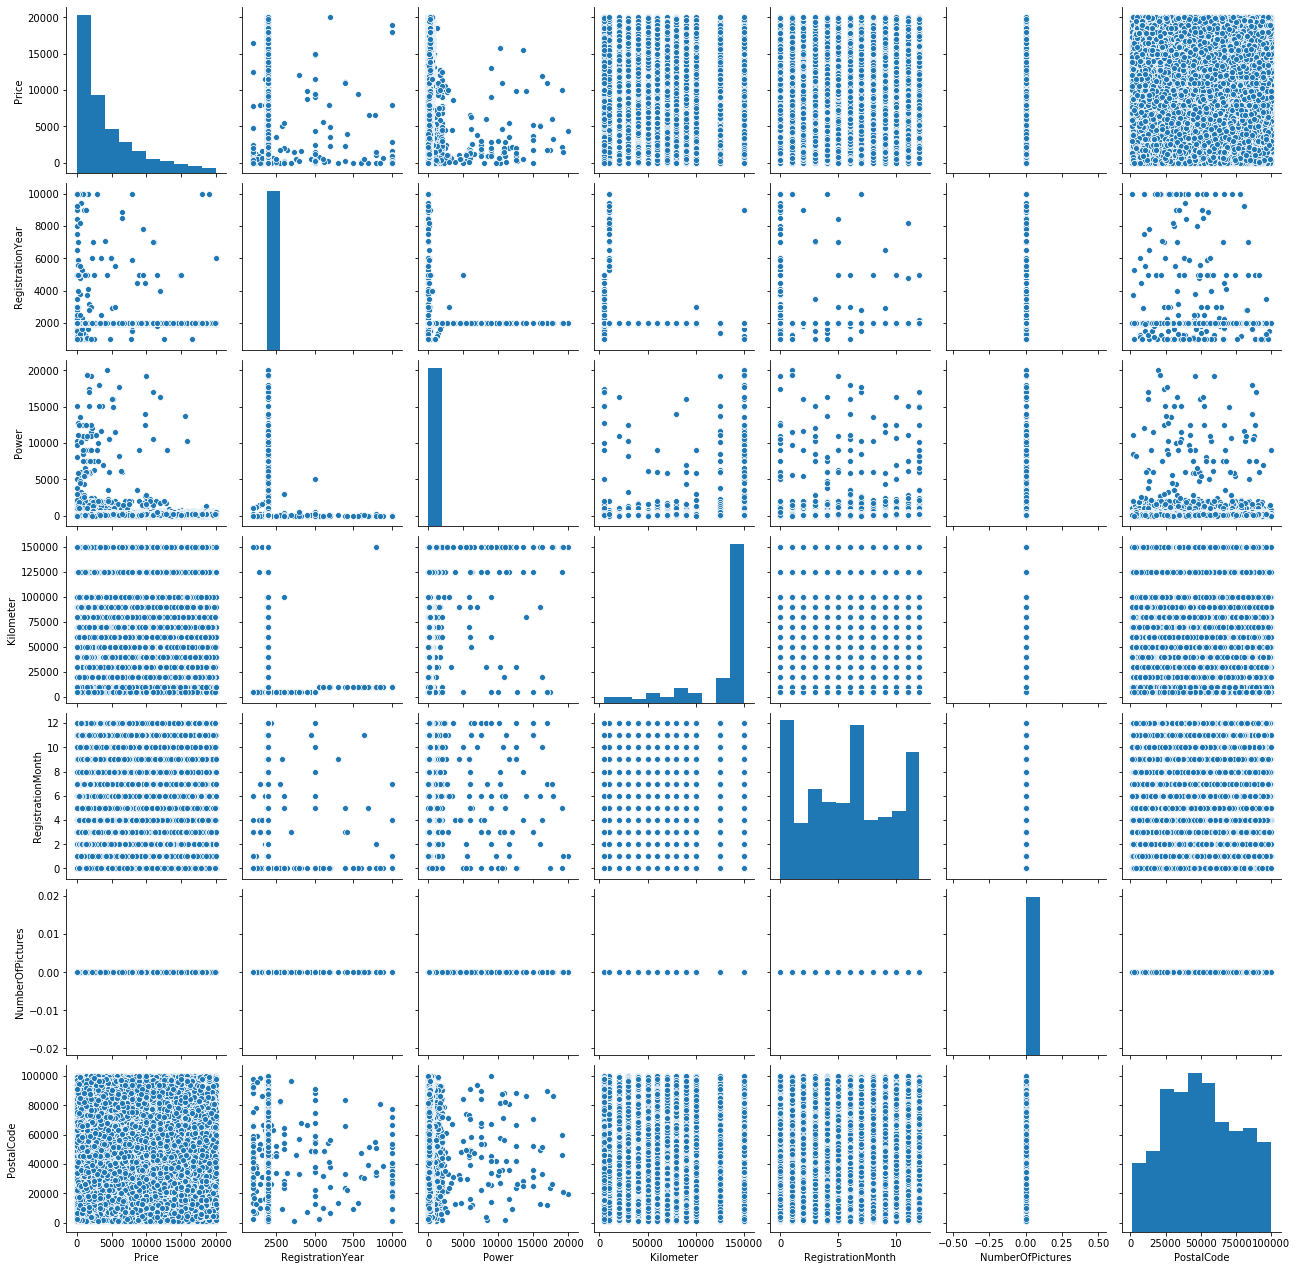

In [4]:
first_look(data, scatter_matrix=True)

Разберём информацию выше по порядку и обозначим список действий, которые мы выполним на следующем шаге:
- **info()**:
    - В наборе данных 350000+ строк - это довольно много.
    - Названия столбцов стоит немного изменить, чтобы нам было проще к ним обращаться.
    - Сразу видим, что данные содержат пропуски - посмотрим на природу пропусков чуть позже.
    - Данные имеют тип `object` - категории имеет смысл закодировать, особенно, если их немного.
- **head()**:
    - Первая же строка битая - видим нули и NaN. Обратим внимание на похожие случаи и избавимся от них.
    - *petrol* и *gasoline* - названия одного и того же топлива в Великобритании и США - приравняем их друг к другу.
    - Предположительно, даты, связанные с сайтом, не имеют особого смысла для машины, которую мы оцениваем **сейчас**. Единственное, что стоит оставить - это дата размещения объявления: по ней мы можем выявить зависимость цены от года, в котором эта цена назначена. 
    - Также под сомнение поставим месяц регистрации - вот **год точно имеет смысл**.
    - Почтовый индекс вряд ли нужен, хотя он может указывать на регион продажи, а стоимость может колебаться в зависимости от региона 🤔. Если индексов немного, то можно будет рассмотреть их как категориальный признак.
- **nunique()**:
    - Фотографий всегда 0 - столбец на выброс.
    - 13 месяцев - один лишний. Да и вряд ли они вообще понадобятся.
    - 40 марок автомобилей и 250 моделей. Такие данные лучше закодировать с помощью `OrdinalEncoder`, иначе получится огромное число столбцов. А можно, объединить эти признаки в один столбец! 💡 Зачем? Так мы избежим автомобилей с разными марками, но с одним именем модели. Ведь может же такое быть.
    - *151* вариант года регистрации - как такое возможно? Изучим.
    - Данные о ремонте - 2 значения: *'yes'* и *'no'*. NaN скорее означает отсутствие записей о ремонте, но говорить с уверенностью мы не можем.
    - Пробеги явно округлены - всего 13 вариантов значений.
    - Индексов очень много - не лучший категориальный признак. Но он чем-то похож на id и поможет нам проверить объекты на дубликаты.
- **describe()**:
    - Видим выбросы - нулевые значения месяца, мощности и стоимости. Такие строки точно можно выбросить.
    - 1000 год - это сильно. 9999 - ещё сильнее. Такого не может быть. Возможно, это ошибка занесения данных в базу или выгрузки. Надёжнее всего будет удалить такие данные, тем более, что 1 и 3 квантили на месте.
    - Мощность 20000 л.с. - слишком много, интересно будет на это посмотреть.
    - Чтобы как понять распределения признаком лучше, мы нарисуем **ящики с усами** чуть позже.
- **corr()**:
    - Мы не заметили сильной корреляции между целевым признаком и другими признаками. Единственное явное - это отрицательная корреляция стоимости и пробега. Что вполне можно объяснить. Если избавить данные от выбросов, к корреляции можно будет вернуться, потому что сейчас эти расчёты далеки от реальности.
- **pairplot()**:
    - Интереснее всего в этой таблице гистограммы:
        - Распределение стоимостей похоже на пуассоновское.
        - Пробег чаще большой - на просторах интернета проще найти бывалую машину, чем молоденькую.
        
Наши предстоящие действия по предобработке примерно понятны. Поэтому приступим к их выполнению.

---

## 2. Предобработка данных

Первым делом переименуем столбцы в более доступный вид.

In [5]:
# Переведём все названия столбцов в нижний регистр
data.columns = data.columns.str.lower()
data.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

Выбросим явно лишние столбцы. Оставим индексы, чтобы проверить по ним дубликаты в дальнейшем.

In [6]:
data.drop(['datecrawled', 'numberofpictures', 'registrationmonth', 'lastseen'], axis=1, inplace=True)

In [7]:
# Переименуем оставшиеся столбцы
data.rename({'vehicletype' : 'body',
             'registrationyear': 'year_reg',
             'kilometer': 'mileage',
             'power': 'hp',
             'gearbox': 'gear',
             'datecreated': 'date',
             'notrepaired': 'intact',
             'fueltype': 'fuel'}, axis=1, inplace=True)

In [8]:
data.head()

,price,body,year_reg,gear,hp,model,mileage,fuel,brand,intact,date,postalcode
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,2016-03-24 00:00:00,66954
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,2016-03-14 00:00:00,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17 00:00:00,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016-03-31 00:00:00,60437


Теперь таблица выглядит аккуратно. Перейдём к пропускам.

---

### Обработка пропусков

Вспомним, где и сколько у нас пропусков.

In [9]:
from toads.eda import na_part

In [10]:
na_part(data)

price         0.000000
body          0.105794
year_reg      0.000000
gear          0.055967
hp            0.000000
model         0.055606
mileage       0.000000
fuel          0.092827
brand         0.000000
intact        0.200791
date          0.000000
postalcode    0.000000
dtype: float64

Пройдёмся по каждому признаку. Порассуждаем, насколько он важен, и можно ли его недеструктивно заполнить.

#### Модель автомобиля

Мы начнём с модели, потому что после этого появится возможность совместить столбцы марки и модели. Тем более, что угадать модель не представляется возможным. Просто **удалим строки**, где отсутствует модель.

In [11]:
data.dropna(subset=['model'], inplace=True)

In [12]:
na_part(data.model, verbose=True)

Доля пропусков в столбце "model" равна 0.0%


---

#### Совмещение признаков марки и модели

Проверим, есть ли дублирующиеся названия моделей у разных марок.

In [13]:
# Сколько моделей
data.model.nunique()

250

In [14]:
# Соединяем марки с моделями
brand_model = data.brand + ' ' + data.model
brand_model.nunique()

297

Как интересно выросло количество сочетаний. Посмотрим глазами, может ли модель с одним и тем же названием встречаться у разных производителей.

In [15]:
data.groupby('model').agg(lambda x: x.nunique())['brand'].sort_values(ascending=False).head()

model
other         39
grand          3
discovery      2
freelander     2
defender       2
Name: brand, dtype: int64

- Из увиденного можно сделать вывод, что модели и марки действительно **не соотносятся 1 к 1**, и мы не зря это поисследовали.
- Есть большое количество моделей, помеченных как *other*, которые, судя по всему, отсутствуют в базе нашего сервиса купли-продажи.

Добавим столбец в датафрейм и воспользуемся им, чтобы как можно точнее заполнить пропуски в кузовах.

In [16]:
data.loc[:, 'brand_model'] = brand_model

In [17]:
data.head()

,price,body,year_reg,gear,hp,model,mileage,fuel,brand,intact,date,postalcode,brand_model
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,volkswagen golf
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,jeep grand
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17 00:00:00,91074,volkswagen golf
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016-03-31 00:00:00,60437,skoda fabia
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,2016-04-04 00:00:00,33775,bmw 3er


---

#### Кузов

In [18]:
# Какие есть кузовы?
data.body.unique()

array([nan, 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       'coupe', 'other'], dtype=object)

In [19]:
# Много ли пропусков?
na_part(data.body, verbose=True)

Доля пропусков в столбце "body" равна 9.2%


Не хотелось бы отбрасывать целые 9%. Попробуем заполнить пропуски по моделям с помощью моды - самого частого значения. Это будет своего рода голосованием.

In [20]:
# Найдём моды кузовов для каждой марки-модели
model_bodies = data.groupby('brand_model').agg(lambda x: x.mode(dropna=False)[0]).body
model_bodies

brand_model
alfa_romeo 145      small
alfa_romeo 147      sedan
alfa_romeo 156      wagon
alfa_romeo 159      wagon
alfa_romeo other    sedan
                    ...  
volvo v40           wagon
volvo v50           wagon
volvo v60           wagon
volvo v70           wagon
volvo xc_reihe        suv
Name: body, Length: 297, dtype: object

In [21]:
# Заполним пустые значения кузовов из списка-словаря
data.loc[data.body.isna(), 'body'] = data.loc[data.body.isna(), 'brand_model'].apply(lambda x: model_bodies[x])

In [22]:
na_part(data.body, verbose=True)

Доля пропусков в столбце "body" равна 0.0%


Потрясающе сработал наш метод заполнения пропусков! Теперь не жалко и удалить то, что осталось.

In [23]:
data.dropna(subset=['body'], inplace=True)

С кузовами мы разобрались - теперь можно двигаться дальше.

Вспомним, что осталось обработать.

In [24]:
na_part(data)[na_part(data) > 0]

gear      0.046917
fuel      0.076888
intact    0.185540
dtype: float64

Данные, которые у нас остались, **важны** для оценки стоимости, но заполнить их не представляется возможным, потому что:
- Мы не можем сказать наверняка, что означает пропуск в данных о ремонте, и можем ошибиться и неправильно обучить модель.
- Одна и та же машина может производиться в разной комплектации (коробка передач, двигатель).

Поэтому мы удалим строки, в которых остались пропуски, и будем работать с тем, что останется.

In [25]:
data.dropna(inplace=True)

Убедимся, что пропусков не осталось.

In [26]:
assert all(na_part(data) == 0)

#### Вывод из обработки пропусков
- У нас много данных, но мы постарались сделать так, чтобы потерять как можно меньше объектов:
    - Заполнили данные о типах кузовов почти идеально.
    - Удалили объекты, для которых сложно логически восстановить данные, или есть риск неправильно заполнить пропуск.

---

### Типы данных
Посмотрим внимательно, что мы можем сделать с данными.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253906 entries, 3 to 354367
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        253906 non-null  int64 
 1   body         253906 non-null  object
 2   year_reg     253906 non-null  int64 
 3   gear         253906 non-null  object
 4   hp           253906 non-null  int64 
 5   model        253906 non-null  object
 6   mileage      253906 non-null  int64 
 7   fuel         253906 non-null  object
 8   brand        253906 non-null  object
 9   intact       253906 non-null  object
 10  date         253906 non-null  object
 11  postalcode   253906 non-null  int64 
 12  brand_model  253906 non-null  object
dtypes: int64(5), object(8)
memory usage: 27.1+ MB


Бросается в глаза **дата**. Извлечём из неё год и месяц создания объявления. Заодно извлечём день, чтобы в дальнейшем проверить дубликаты с точностью до дня.

In [28]:
# Изменим тип данных
data.date = pd.to_datetime(data.date)
data.date.head(3)

3   2016-03-17
4   2016-03-31
5   2016-04-04
Name: date, dtype: datetime64[ns]

In [29]:
# Создадим столбцы "год" и "месяц"
data.loc[:, 'year_pub'] = data.date.dt.year
data.loc[:, 'month_pub'] = data.date.dt.month
data.loc[:, 'day_pub'] = data.date.dt.day

Теперь можно избавиться от столбца с датой публикации.

In [30]:
data.drop('date', axis=1, inplace=True)

In [31]:
data.head()

,price,body,year_reg,gear,hp,model,mileage,fuel,brand,intact,postalcode,brand_model,year_pub,month_pub,day_pub
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074,volkswagen golf,2016,3,17
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437,skoda fabia,2016,3,31
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,33775,bmw 3er,2016,4,4
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,67112,peugeot 2_reihe,2016,4,1
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no,19348,volkswagen other,2016,3,21


---

#### Категориальные данные

Сейчас почти все категориальные признаки имеют строковый тип. Это читаемо для исследовательского анализа, но не очень подходит для машинного обучения.

Посмотрим, какие признаки можно закодировать по One-Hot - посчитаем уникальные значения. Сделаем это так, чтобы не плодить огромное количество столбцов с нулями.

In [32]:
# Столбцы, где уникальных значений не больше 10 
data.nunique()[data.nunique() <= 10]

body         8
gear         2
fuel         7
intact       2
year_pub     2
month_pub    8
dtype: int64

Вспоминаем про типы топлива: *petrol* и *gasoline* - одно и то же.

In [33]:
data.fuel.unique()

array(['petrol', 'gasoline', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

Больше неявных дубликатов мы не заметили.

In [34]:
# Переименуем gasoline на petrol
data.fuel.where(data.fuel != 'gasoline', 'petrol', inplace=True)

In [35]:
# Проверим результат
data.fuel.unique()

array(['petrol', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

Перейдём к One-Hot кодированию признаков.

In [36]:
# Используем отдельный датафрейм для обучения
ldata = data.copy()

In [37]:
# Выберем то, что считаем нужным.
to_oh_cols = ['body', 'gear', 'fuel', 'intact']

In [38]:
# Выборочно удалим столбцы с категорией "другое" вручную
# Переименуем столбец с ремонтом в понятный вид
# Заменим столбцы с названиями на 1-0
ldata = (ldata
         .drop(to_oh_cols, axis=1)
         .join(pd.get_dummies(ldata[to_oh_cols])
               .drop(['body_other', 'gear_manual', 'fuel_other', 'intact_yes'], axis=1)
               .rename({'intact_no': 'had_repairs'}, axis=1))
        )

In [39]:
ldata.head()

,price,year_reg,hp,model,mileage,brand,postalcode,brand_model,year_pub,month_pub,day_pub,body_bus,body_convertible,body_coupe,body_sedan,body_small,body_suv,body_wagon,gear_auto,fuel_cng,fuel_electric,fuel_hybrid,fuel_lpg,fuel_petrol,had_repairs
3,1500,2001,75,golf,150000,volkswagen,91074,volkswagen golf,2016,3,17,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,3600,2008,69,fabia,90000,skoda,60437,skoda fabia,2016,3,31,0,0,0,0,1,0,0,0,0,0,0,0,1,1
5,650,1995,102,3er,150000,bmw,33775,bmw 3er,2016,4,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,2200,2004,109,2_reihe,150000,peugeot,67112,peugeot 2_reihe,2016,4,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
7,0,1980,50,other,40000,volkswagen,19348,volkswagen other,2016,3,21,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [40]:
del to_oh_cols

Вряд ли теперь есть смысл оставлять составной признак с полным названием автомобиля: он помог нам, когда мы заполняли пропуски. Теперь избавимся от него.

In [41]:
ldata.drop('brand_model', axis=1, inplace=True)

У нас остались только названия марок и моделей машин, как с самого начала. Закодируем их числами.

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
# Обозначим нужные столбцы
brand_model_cols = ['brand', 'model']

In [44]:
# Закодируем данные в столбцах
ldata.loc[:, brand_model_cols] = ldata.loc[:, brand_model_cols].apply(LabelEncoder().fit_transform)

In [45]:
ldata.head()

,price,year_reg,hp,model,mileage,brand,postalcode,year_pub,month_pub,day_pub,body_bus,body_convertible,body_coupe,body_sedan,body_small,body_suv,body_wagon,gear_auto,fuel_cng,fuel_electric,fuel_hybrid,fuel_lpg,fuel_petrol,had_repairs
3,1500,2001,75,116,150000,37,91074,2016,3,17,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,3600,2008,69,101,90000,31,60437,2016,3,31,0,0,0,0,1,0,0,0,0,0,0,0,1,1
5,650,1995,102,11,150000,2,33775,2016,4,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,2200,2004,109,8,150000,25,67112,2016,4,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
7,0,1980,50,166,40000,37,19348,2016,3,21,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Так уже лучше. Проверим, что осталось сделать с типами данных.

In [46]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253906 entries, 3 to 354367
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   price             253906 non-null  int64
 1   year_reg          253906 non-null  int64
 2   hp                253906 non-null  int64
 3   model             253906 non-null  int64
 4   mileage           253906 non-null  int64
 5   brand             253906 non-null  int64
 6   postalcode        253906 non-null  int64
 7   year_pub          253906 non-null  int64
 8   month_pub         253906 non-null  int64
 9   day_pub           253906 non-null  int64
 10  body_bus          253906 non-null  uint8
 11  body_convertible  253906 non-null  uint8
 12  body_coupe        253906 non-null  uint8
 13  body_sedan        253906 non-null  uint8
 14  body_small        253906 non-null  uint8
 15  body_suv          253906 non-null  uint8
 16  body_wagon        253906 non-null  uint8
 17  gear_auto 

In [47]:
del brand_model_cols

#### Вывод по типам данных
- Мы извлекли из столбца с датой размещения объявления **год и месяц**, а исходный столбец удалили.
- Столбцы со строковым типом содержали категориальные данные, и мы обработали их двумя способами:
    1. Закодировали по принципу **One-Hot** столбцы, в которых *менее 10* уникальных значений.
    2. Закодировали марки и модели автомобилей числами с помощью `LabelEncoder`.
- Также мы удалили столбец с моделью и маркой вместе, потому что от него больше не будет пользы.

\*Возможно, что и от модели не окажется большой пользы. Можно будет попробовать разные наборы признаков.

---

### Обработка дубликатов
Проверим, есть ли дубликаты среди наших автомобилей. Это вряд ли будет критично для обучения, но мы всё равно сделаем контрольную проверку.

In [48]:
ldata.duplicated().sum() / ldata.shape[0]

0.0357021889990784

Интересно, больше 3% дубликатов, которые появились день в день с одним и тем же почтовым индексом. Выглядит так, будто объявление ошибочно создали, удалили и затем создали снова. Удалим их без зазрения совести. А заодно и столбцы с днём и индексом.

In [49]:
# Удалим дубликаты
ldata.drop_duplicates(inplace=True)

# Отбросим столбцы
ldata.drop(['postalcode', 'day_pub'], axis=1, inplace=True)

In [50]:
ldata.head()

,price,year_reg,hp,model,mileage,brand,year_pub,month_pub,body_bus,body_convertible,body_coupe,body_sedan,body_small,body_suv,body_wagon,gear_auto,fuel_cng,fuel_electric,fuel_hybrid,fuel_lpg,fuel_petrol,had_repairs
3,1500,2001,75,116,150000,37,2016,3,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,3600,2008,69,101,90000,31,2016,3,0,0,0,0,1,0,0,0,0,0,0,0,1,1
5,650,1995,102,11,150000,2,2016,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,2200,2004,109,8,150000,25,2016,4,0,1,0,0,0,0,0,0,0,0,0,0,1,1
7,0,1980,50,166,40000,37,2016,3,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Не зря мы поинтересовались, есть ли грубые дубликаты. Теперь их нет, и всё станет более разнообразно.

Теперь пришло время разобраться с количественными признаками, потому что у нас возникали к ним вопросы.

---

### Количественные признаки
Мы заметили выбросы в количественных данных, поэтому сейчас исследуем распределения этих признаков и попробуем улучшить ситуацию.

In [51]:
from toads.image import Image
from toads.eda import plot_dist_classic

Перечислим, какие столбцы отвечают за количественные признаки. Данные о времени мы сюда тоже включим, потому что эти величины имеют распределение, которое нам хотелось бы увидеть.

In [52]:
numeric_cols = ['price', 'year_reg', 'hp', 'mileage', 'year_pub']

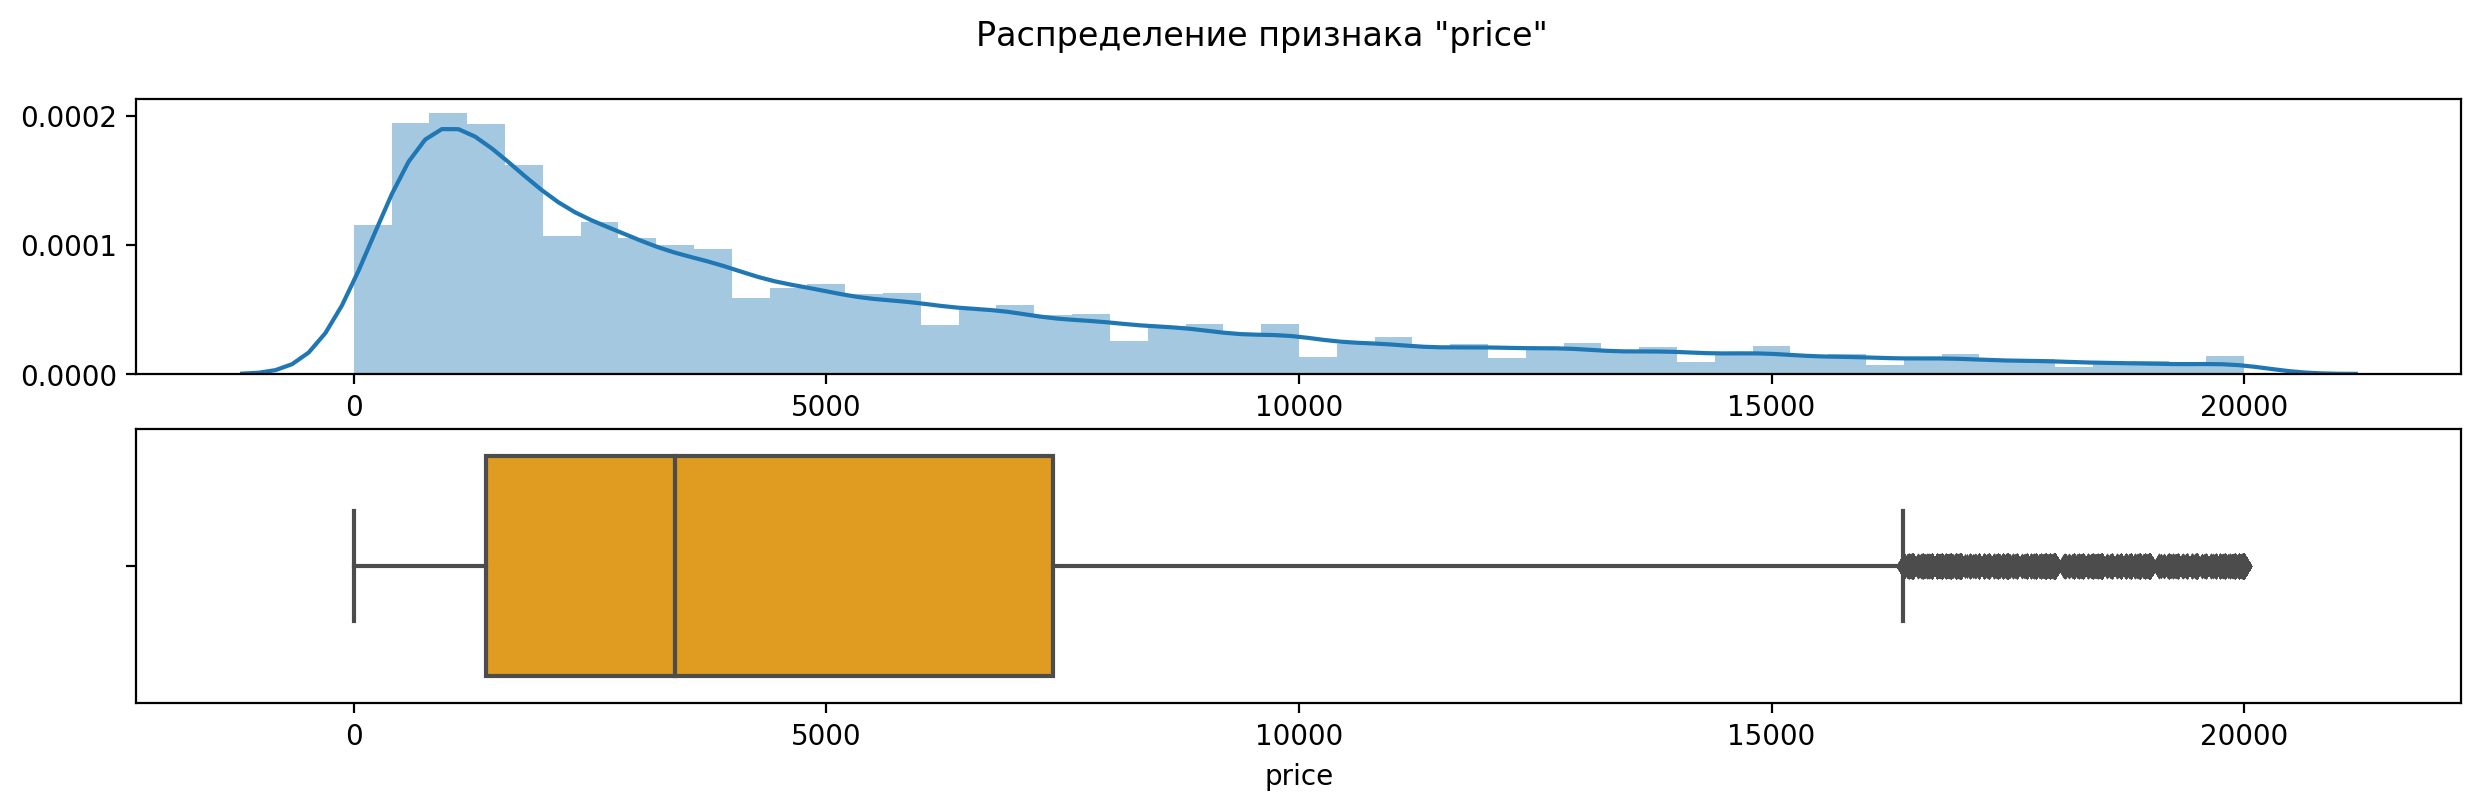

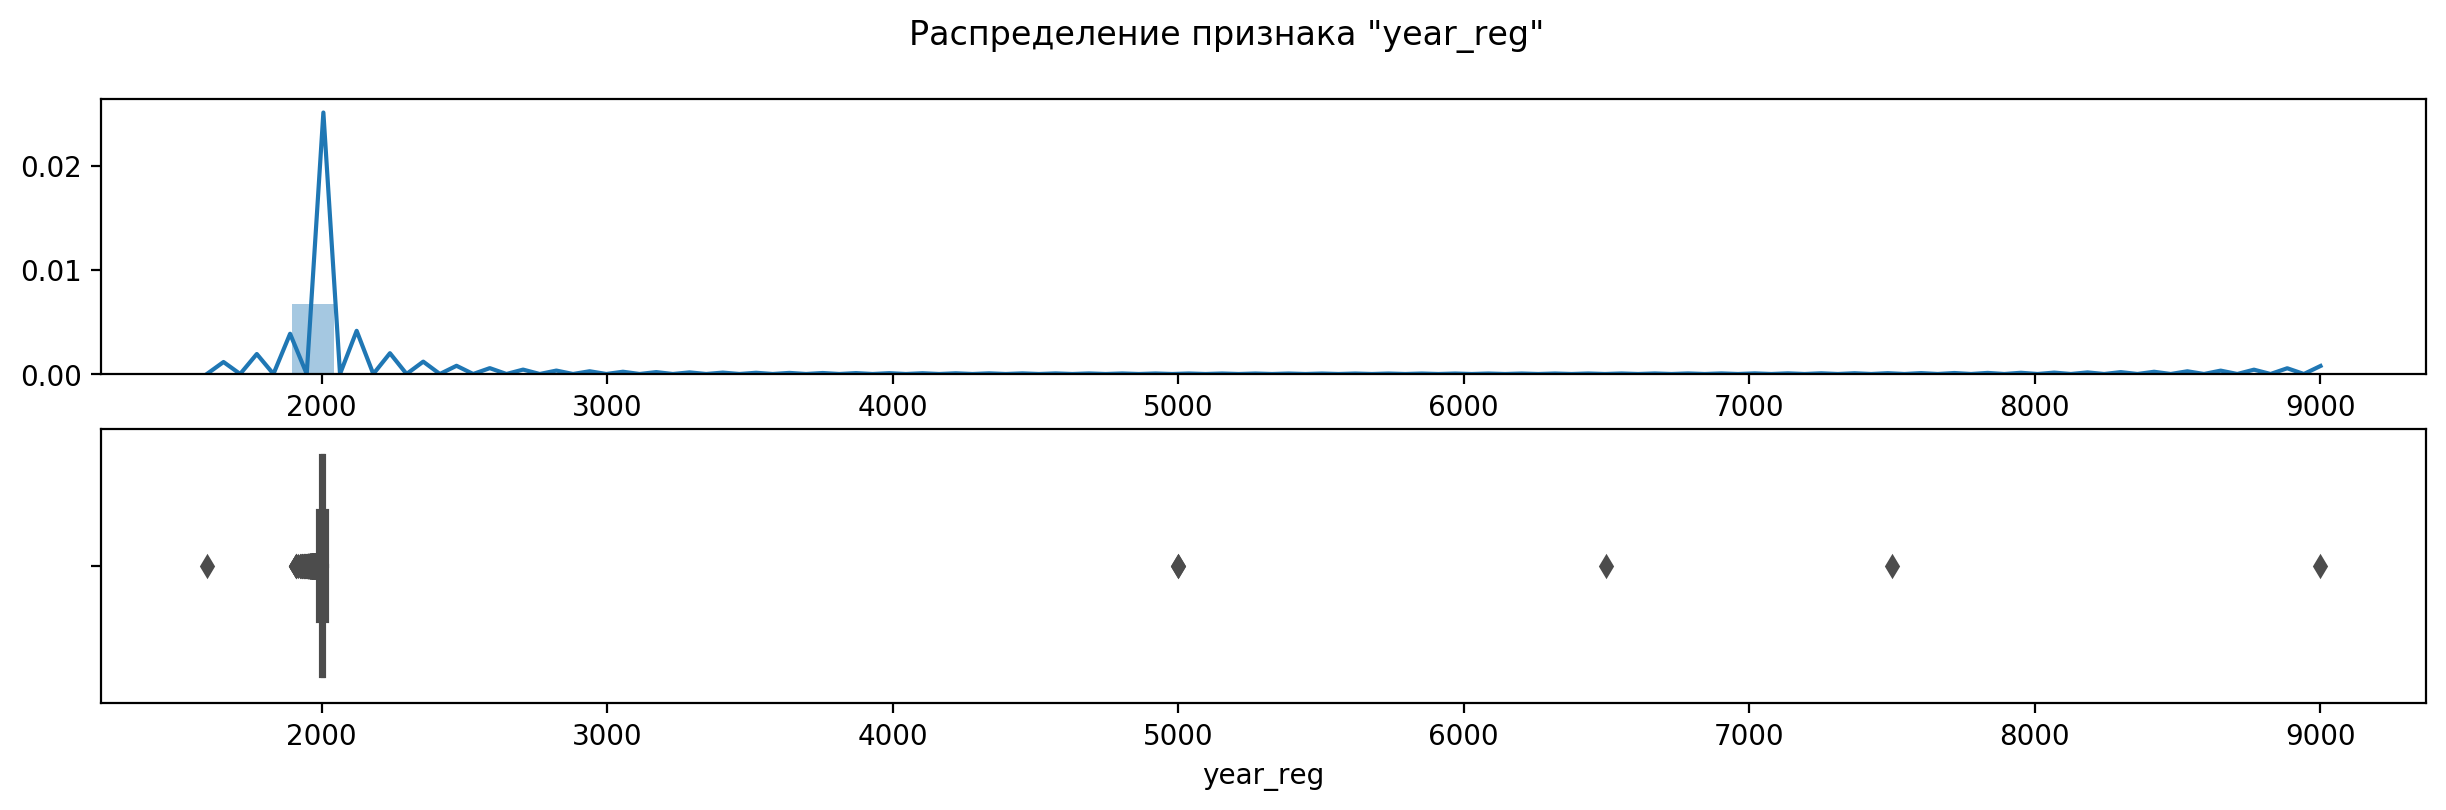

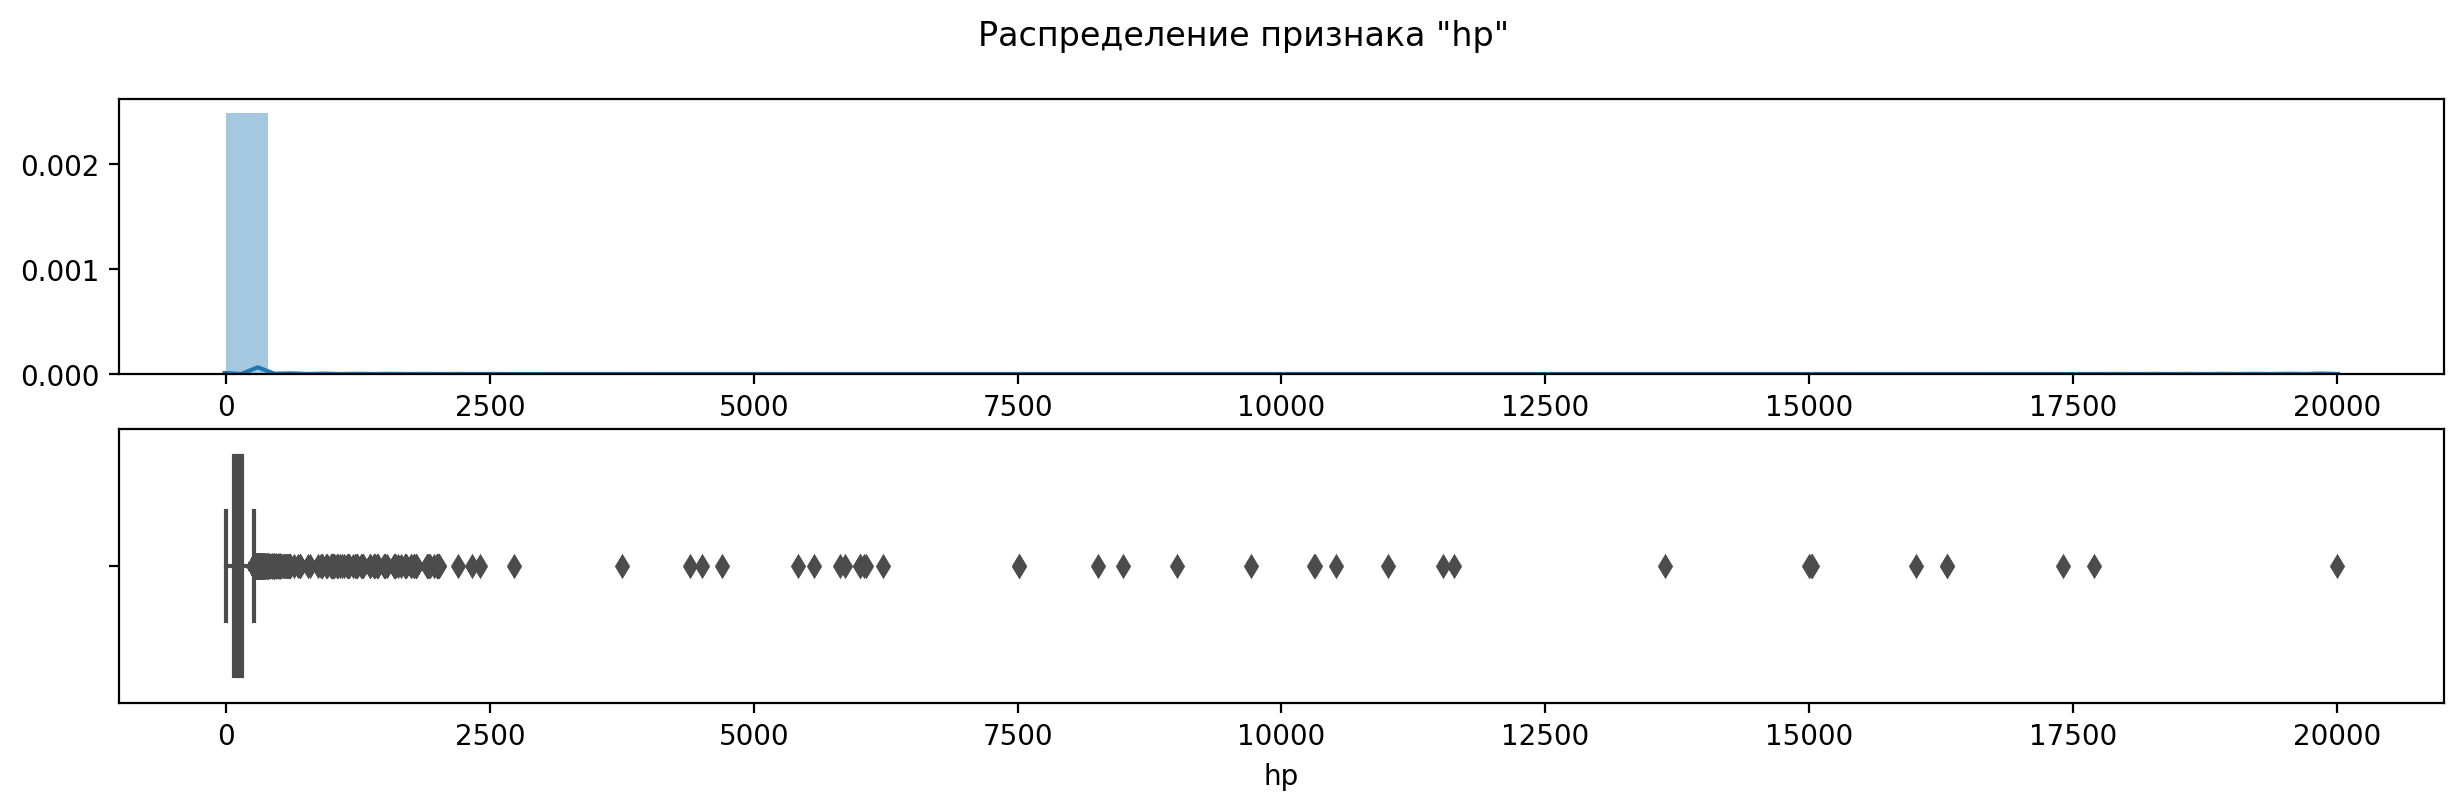

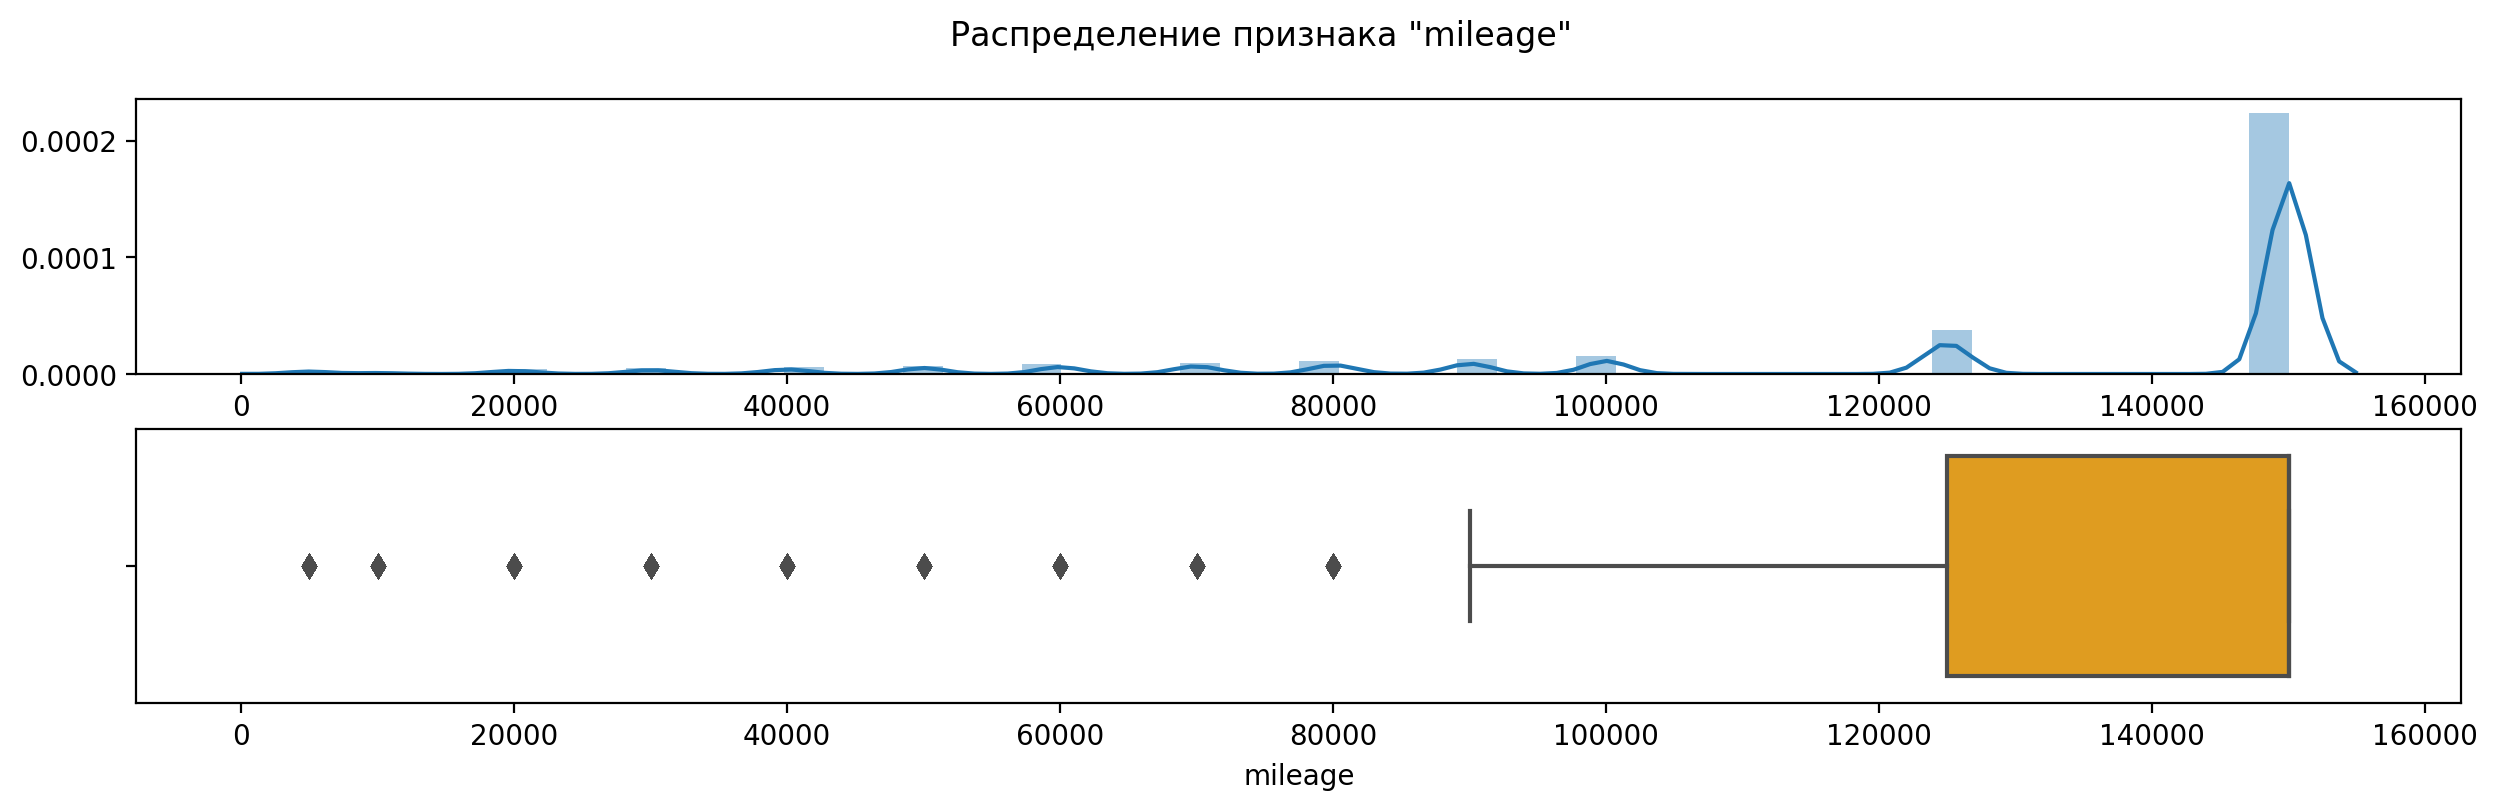

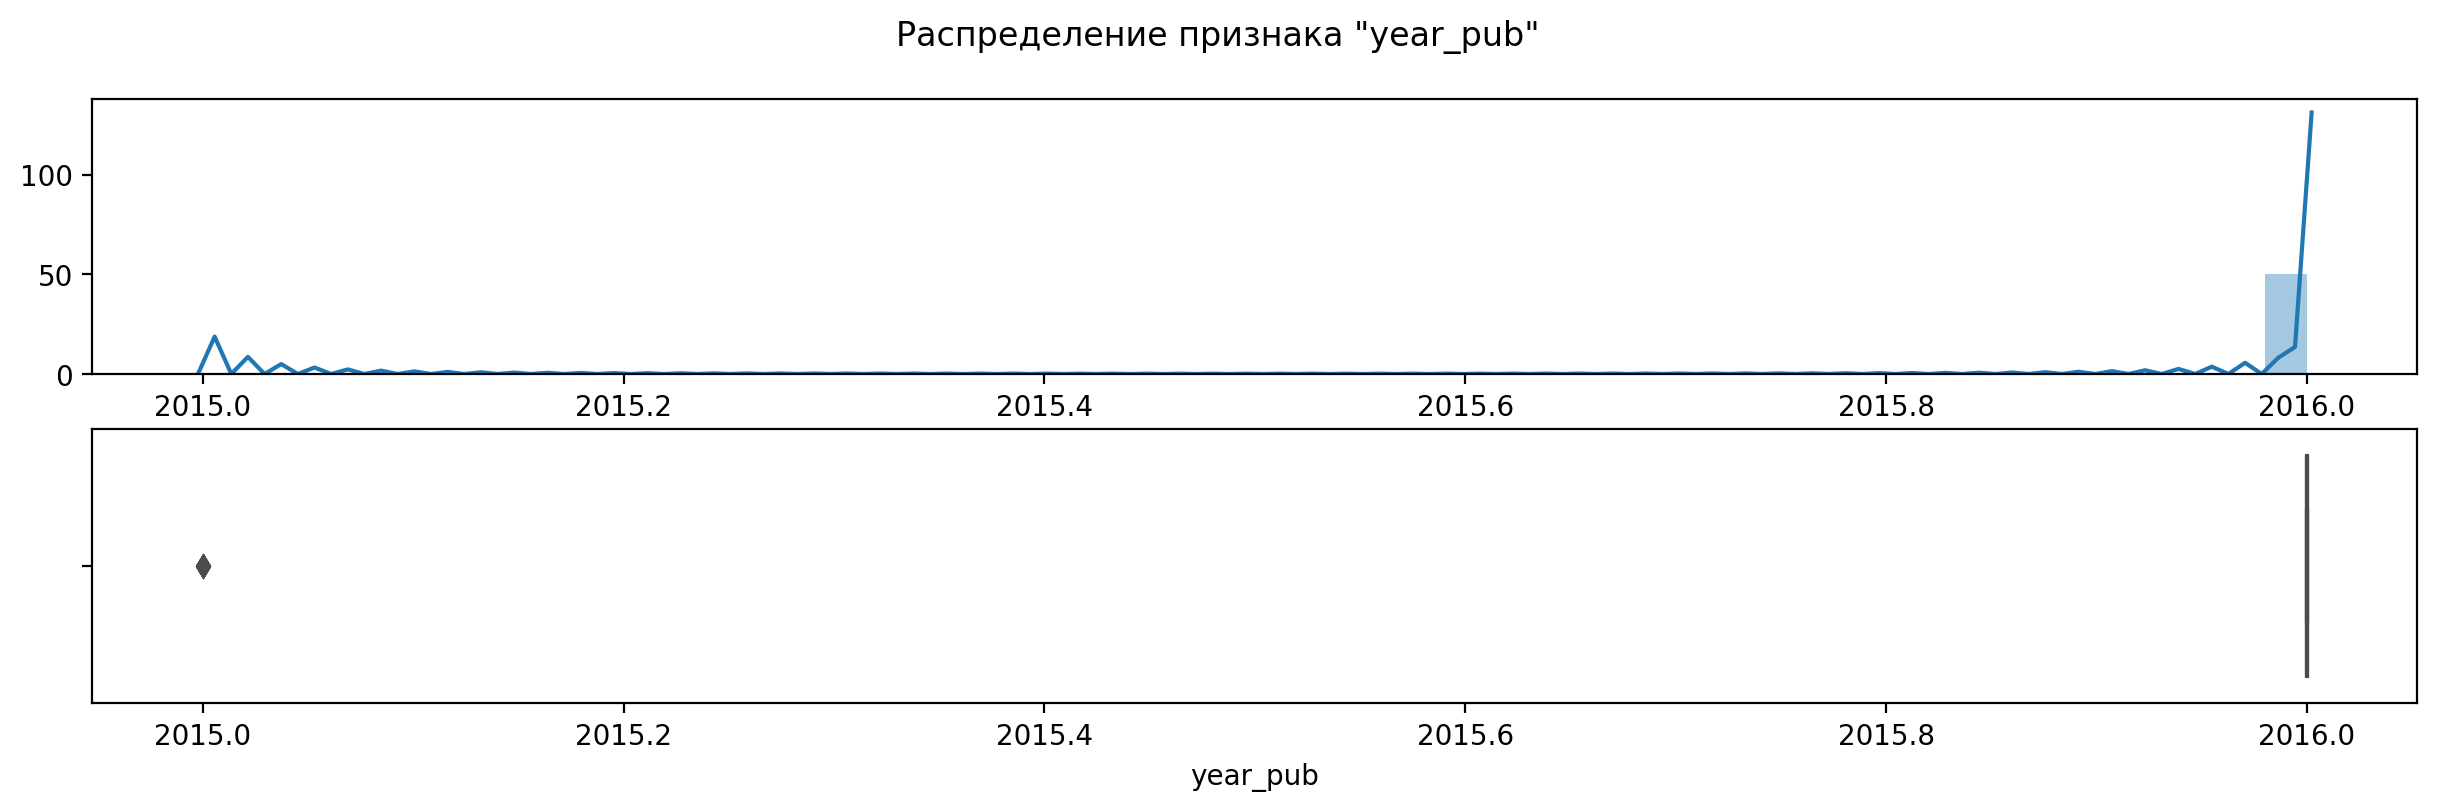

In [53]:
# Нарисуем распределения признаков
plot_dist_classic(ldata, numeric_cols)

Больше всего вопросов вызывают столбцы с годом регистрации и мощностью двигателя.

Отсечём строки, где эти столбцы лежат вне доверительного интервала в *95%*. А заодно удалим столбец с годом объявления, потому что он по сути содержит единственное значение и ни на что не будет влиять при обучении.

In [54]:
# Удаляем столбец с годом публикации объявления
ldata.drop('year_pub', axis=1, inplace=True)
numeric_cols.remove('year_pub')

Для отсечки выбросов по доверительному интервалу воспользуемся написанной нами функцией.

In [55]:
from toads.preprocessing import ci_strip

In [56]:
# Фильтруем выбросы
ldata = ci_strip(ldata, ci=0.95, subset=['hp', 'year_reg'])

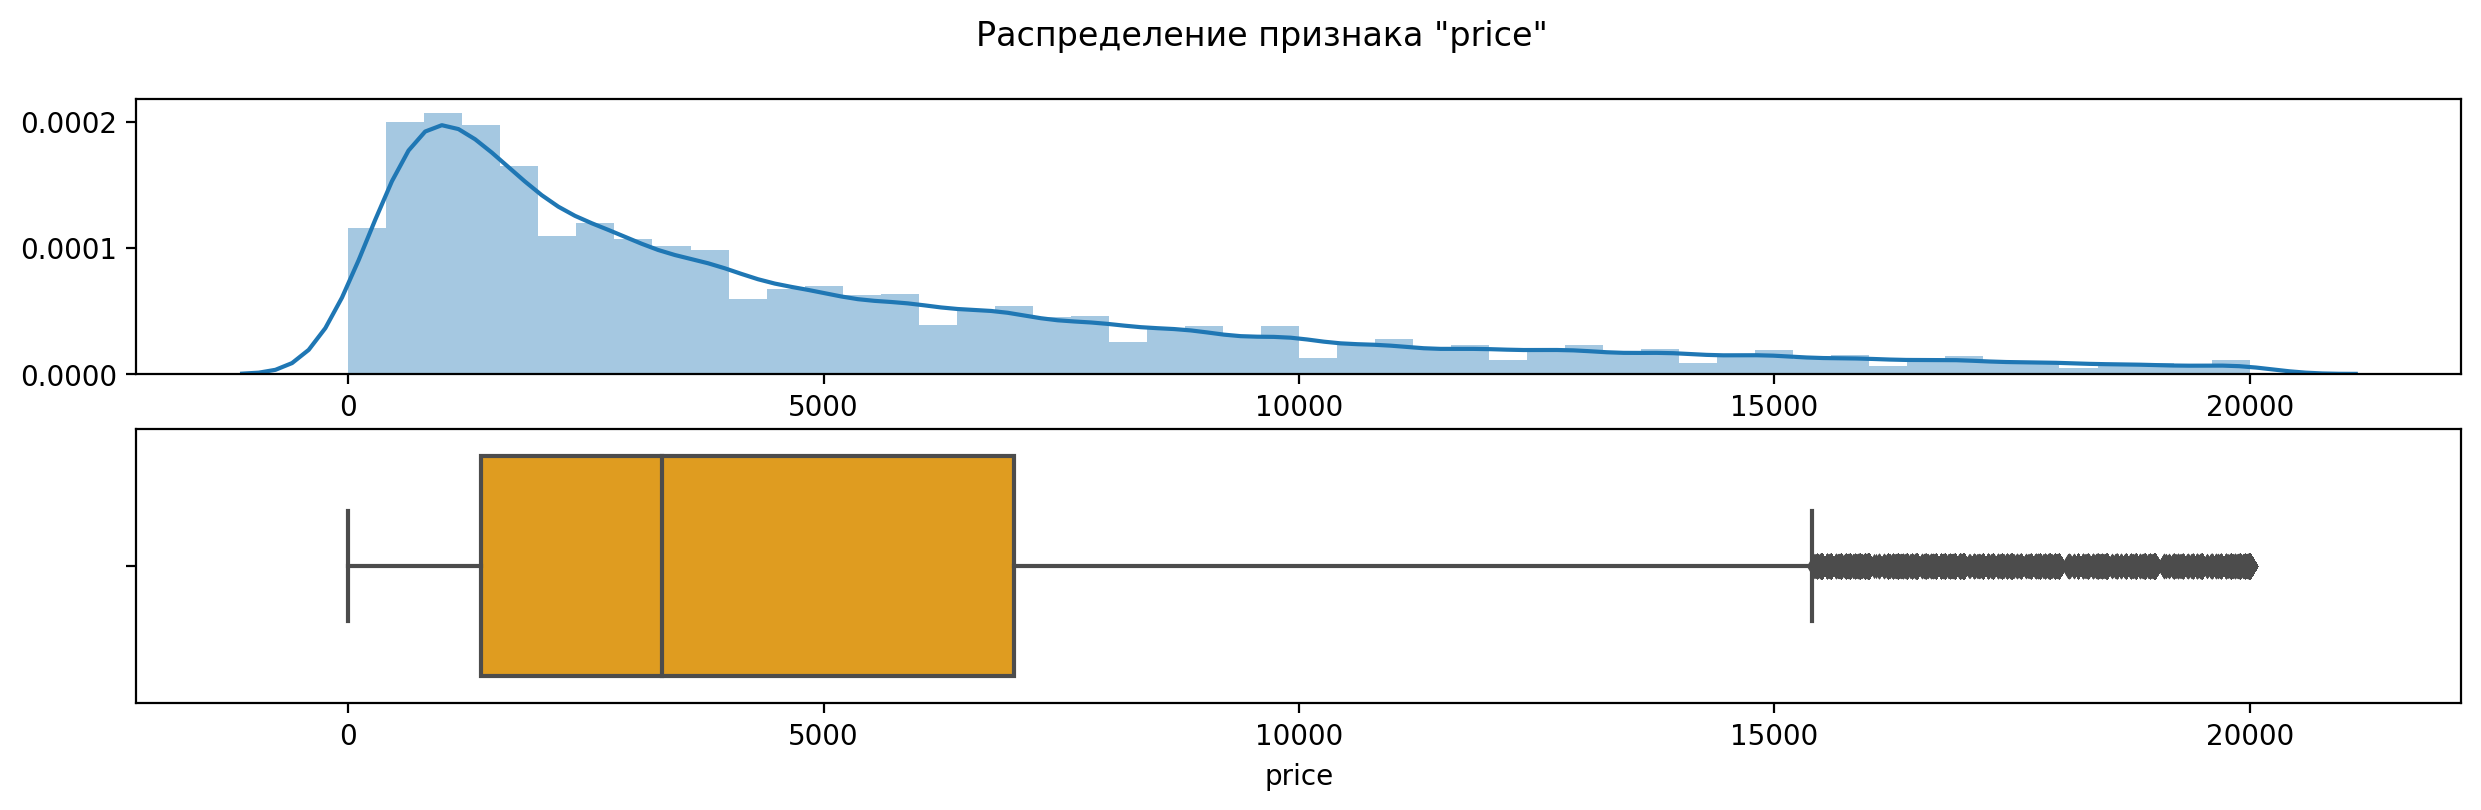

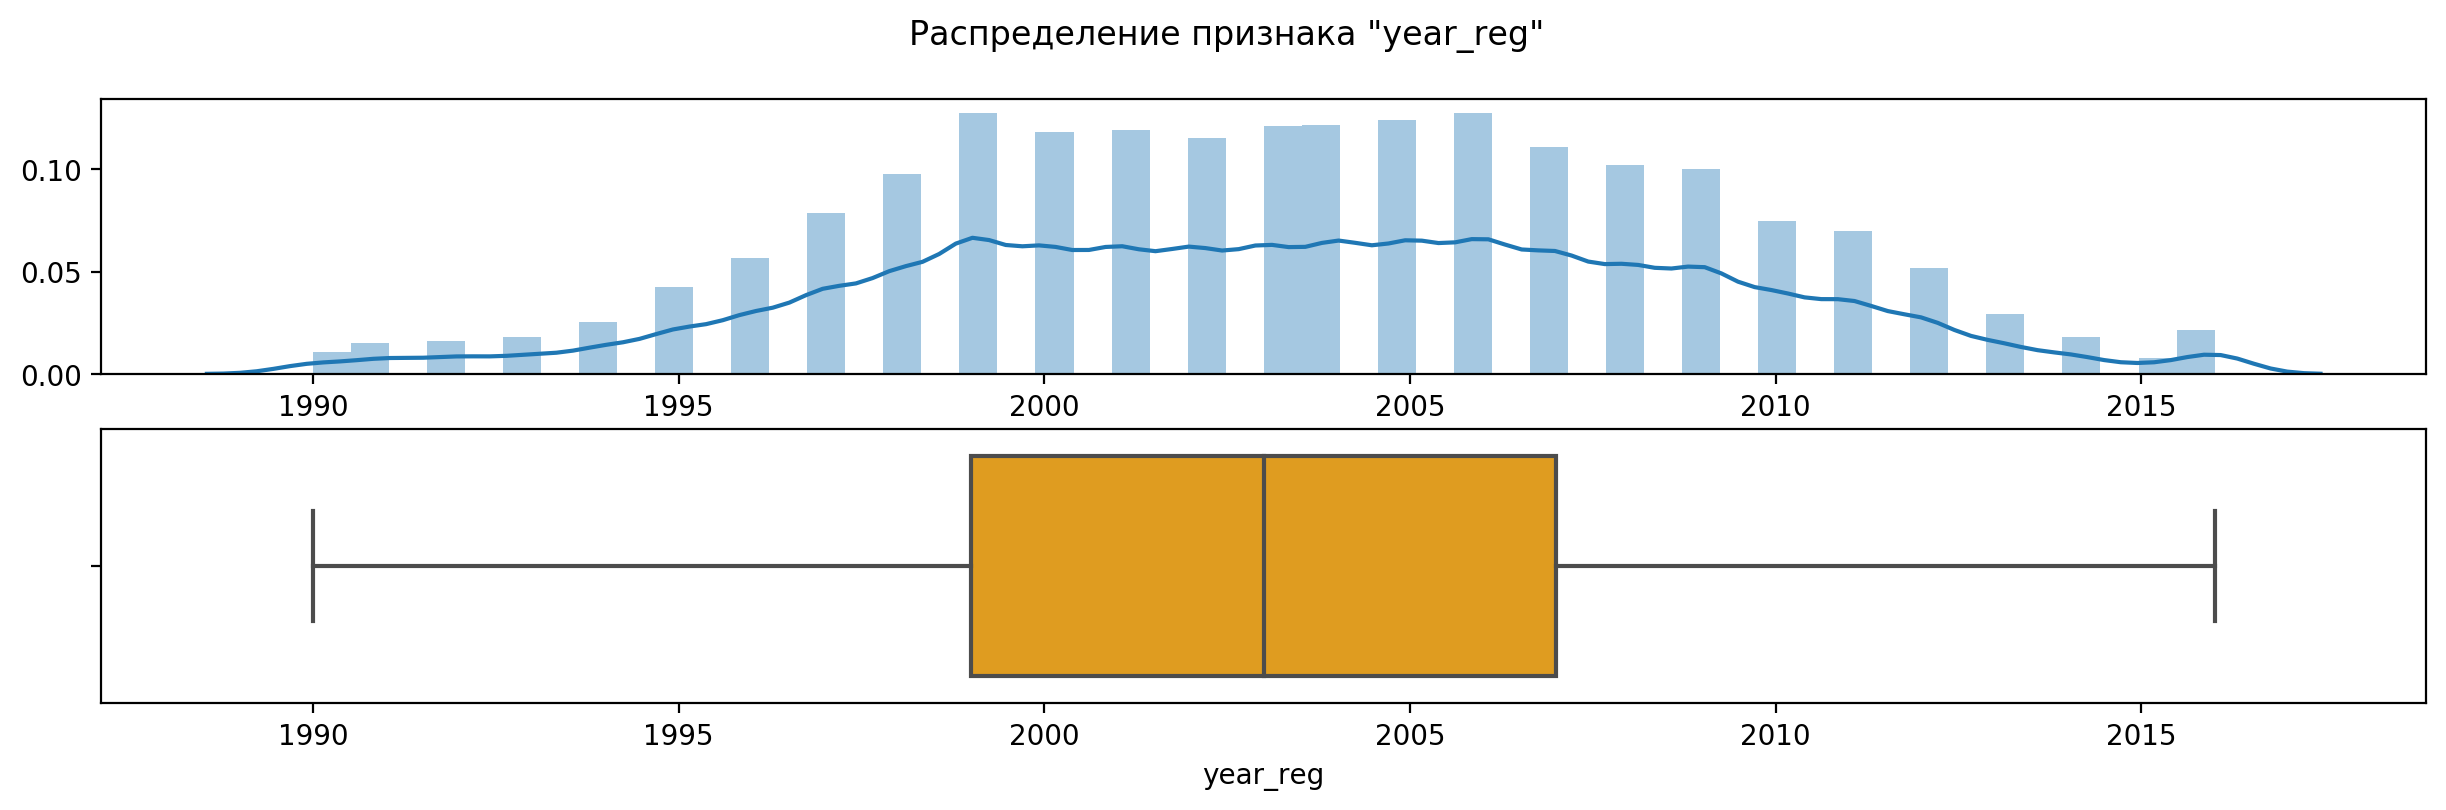

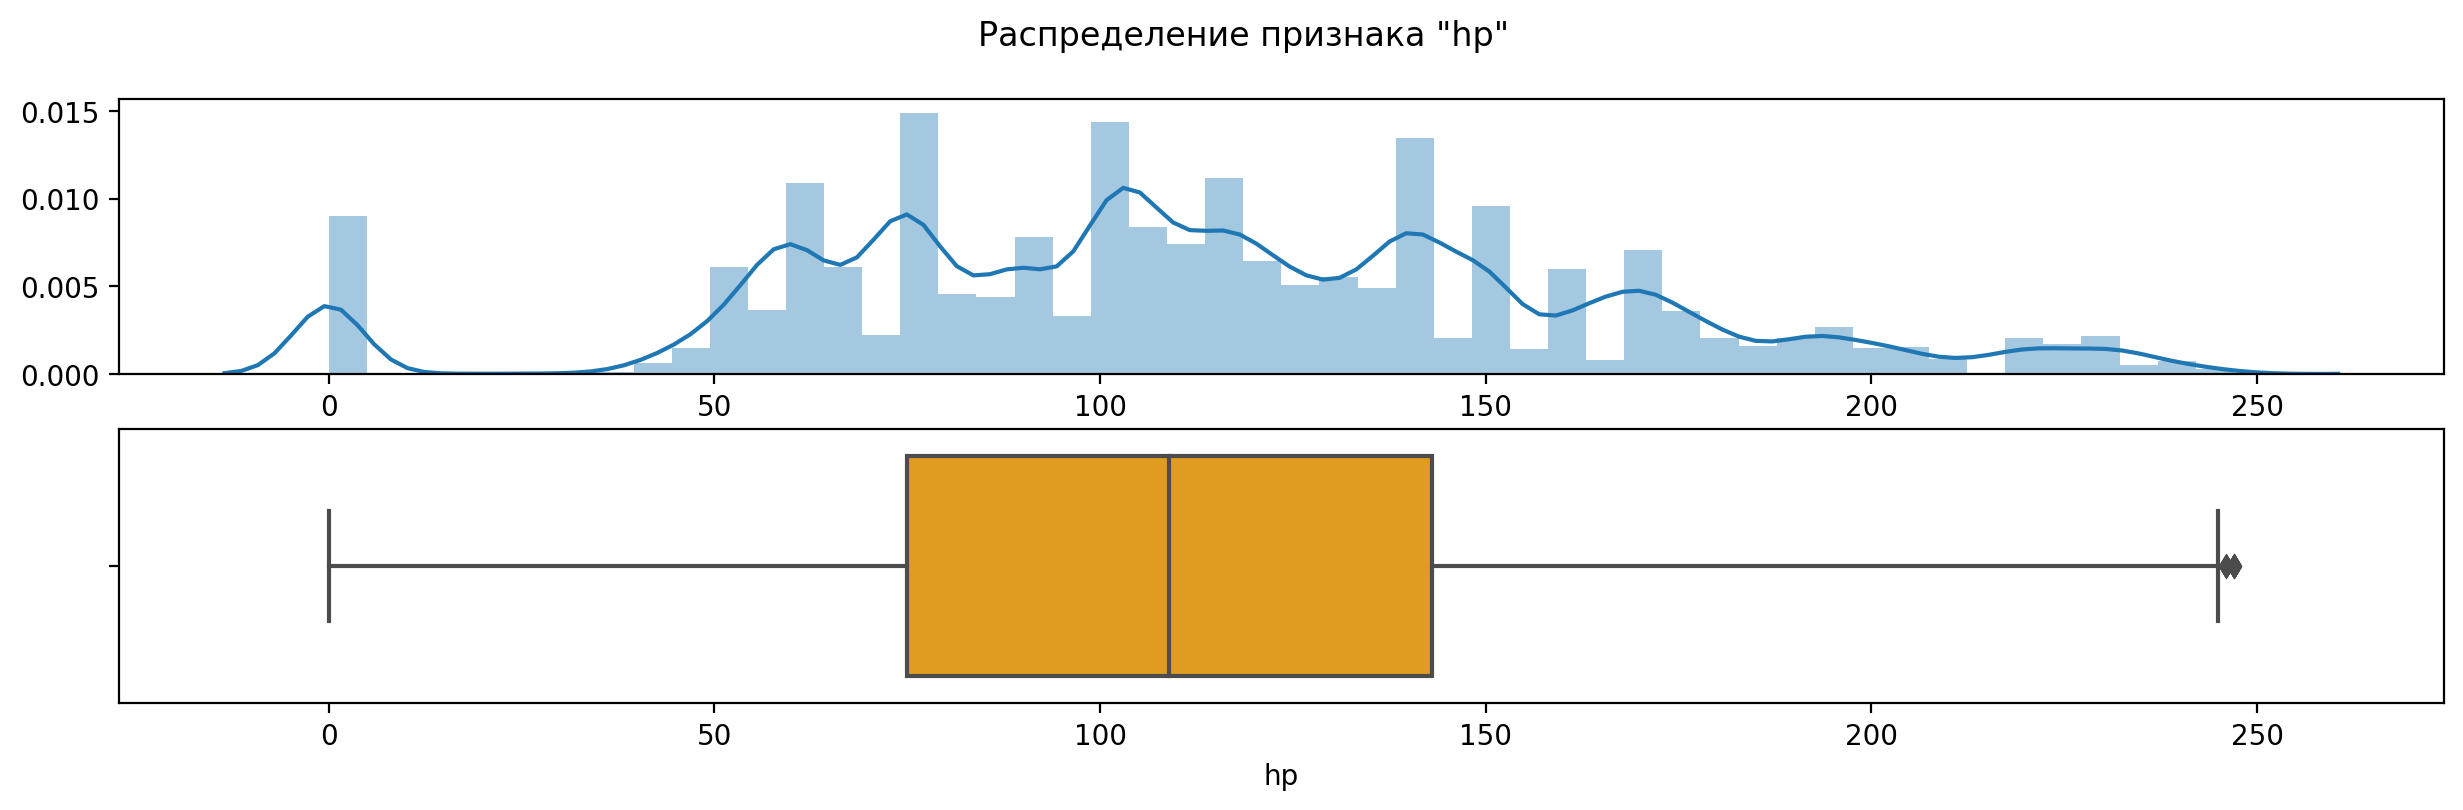

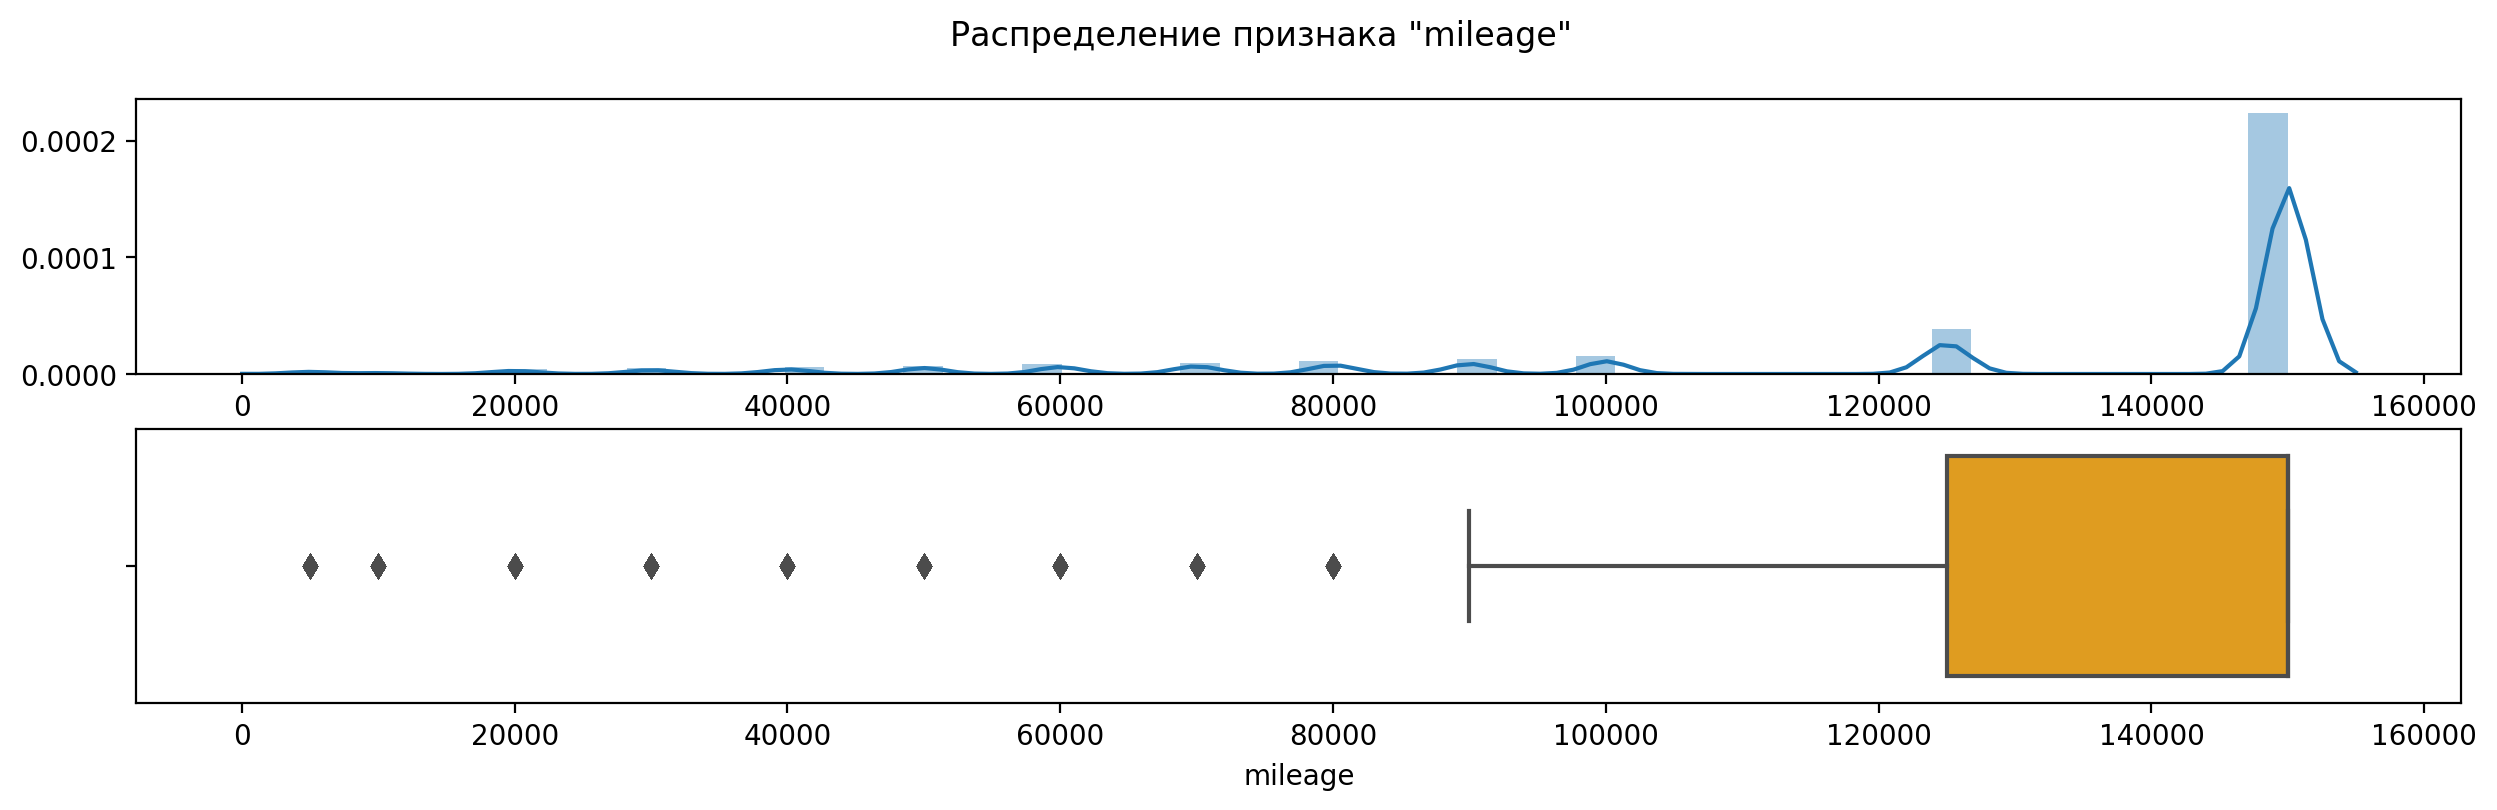

In [57]:
# Посмотрим, что у нас получилось
plot_dist_classic(ldata, numeric_cols)

- Теперь распределения данных выглядят более чем благородно. У нас всё отлично получилось.
- Нас не пугают выбросы в распределении цен на машины, потому что само по себе распределение выглядит замечательно.

Проверим, сколько строк осталось в таблице после того, как мы её обтесали.

In [58]:
ldata.shape[0]

229849

Ещё у нас есть сомнения в данных о месяце публикации. Попробуем поисследовать, зависит ли средняя цена машины от месяца. Если нет, мы удалим этот признак.

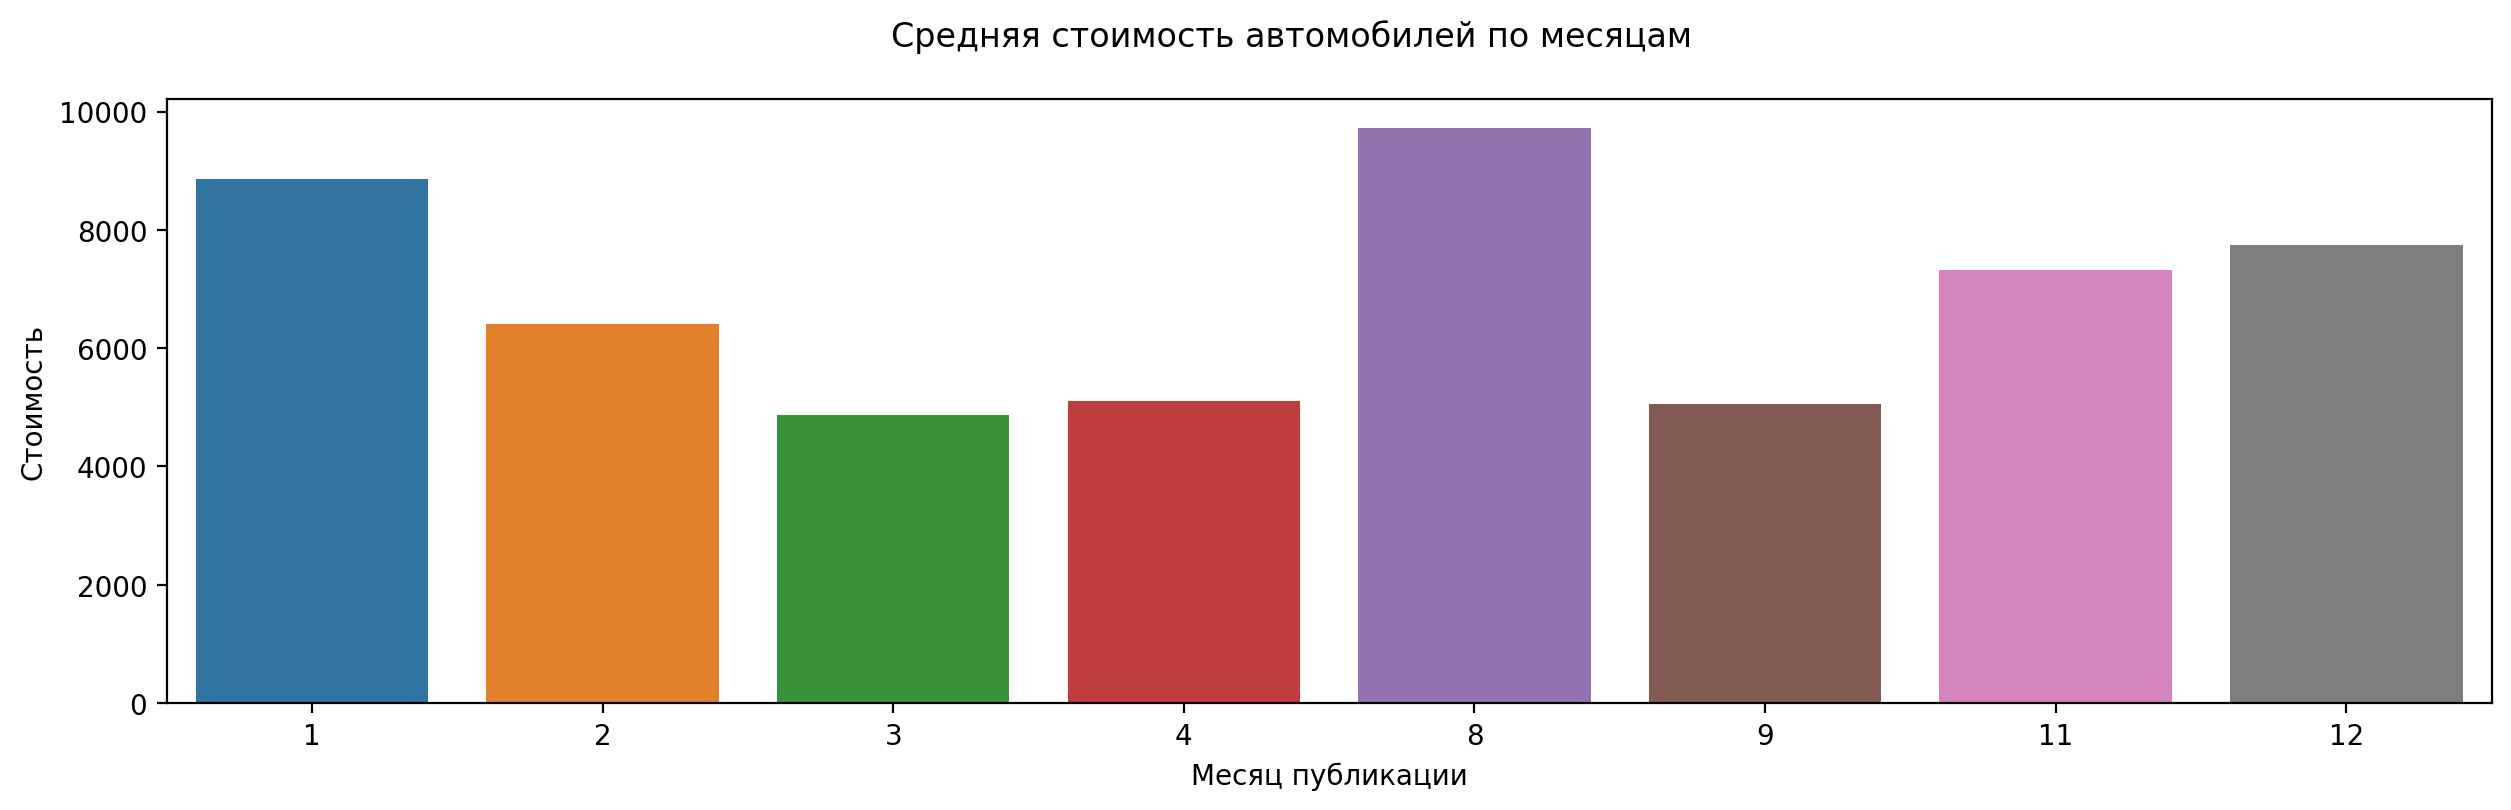

In [59]:
month_stat = ldata.groupby('month_pub').agg({'price': 'mean'})

with Image(st='Средняя стоимость автомобилей по месяцам'):
    sns.barplot(month_stat.index, month_stat.price)
    Image.labels('Месяц публикации', 'Стоимость')

- Наблюдаем некое подобие помесячной сезонности.
- Предположим, что спрос различается в разное время года, и продавцы позволяют себе приподнять цену.
- И оставим признак в таблице.

### Итоги предобработки
В результате наших манипуляций с самого начала проекта мы выбросили уже больше *100 000* строк. Зато теперь мы можем с уверенностью сказать, что наши данные описывают самые что ни на есть **типичные автомобили**, и модель должна с лёгкостью уловить закономерности, которые есть в данных.

Перейдём к разделу, связанному непосредственно с обучением моделей.

---

## 3. Обучение моделей
Мы почти дошли до места, где будем обучать модели, но перед этим выполним рутинную процедуру разделения на обучающую и тестовую выборки. А потом нас ждёт ещё кое-что.

### Разделение данных на выборки

In [60]:
from sklearn.model_selection import train_test_split
from helpers.eda import print_shapes

In [61]:
rstate = 0
x_train, x_test, y_train, y_test = train_test_split(ldata.drop('price', axis=1), ldata.price, random_state=rstate)

In [62]:
print_shapes(x_train, x_test, y_train, y_test)

(172386, 20)
(57463, 20)
(172386,)
(57463,)


Разделение выполнено верно.

---

### Масштабирование признаков
У нас есть два признака, которые мы хотим отмасштабировать. Причём по-разному. Это *мощность двигателя* и *пробег*.

In [63]:
# Мощность мы отмасштабируем по стандартному отклонению,
# а пробег - по межквартильному размаху
from sklearn.preprocessing import RobustScaler, StandardScaler

Некоторые классы в `sklearn` имеют свойство выдавать ошибку, если мы подаём на вход Series. Применим функцию, которая превращает Series в двухмерные массивы с одним столбцом.

In [64]:
from toads.ml import reshape_1d

In [65]:
hp_scaler = StandardScaler()
mileage_scaler = RobustScaler(with_centering=False)

In [66]:
# Обучим скейлеры и отмасштабируем данные в тренировочной выборке
x_train.hp = hp_scaler.fit_transform(reshape_1d(x_train.hp))
x_train.mileage = mileage_scaler.fit_transform(reshape_1d(x_train.mileage))

In [67]:
# Применим скейлеры на тестовой выборке уже без обучения
x_test.hp = hp_scaler.transform(reshape_1d(x_test.hp))
x_test.mileage = mileage_scaler.transform(reshape_1d(x_test.mileage))

Посмотрим, что у нас получилось.

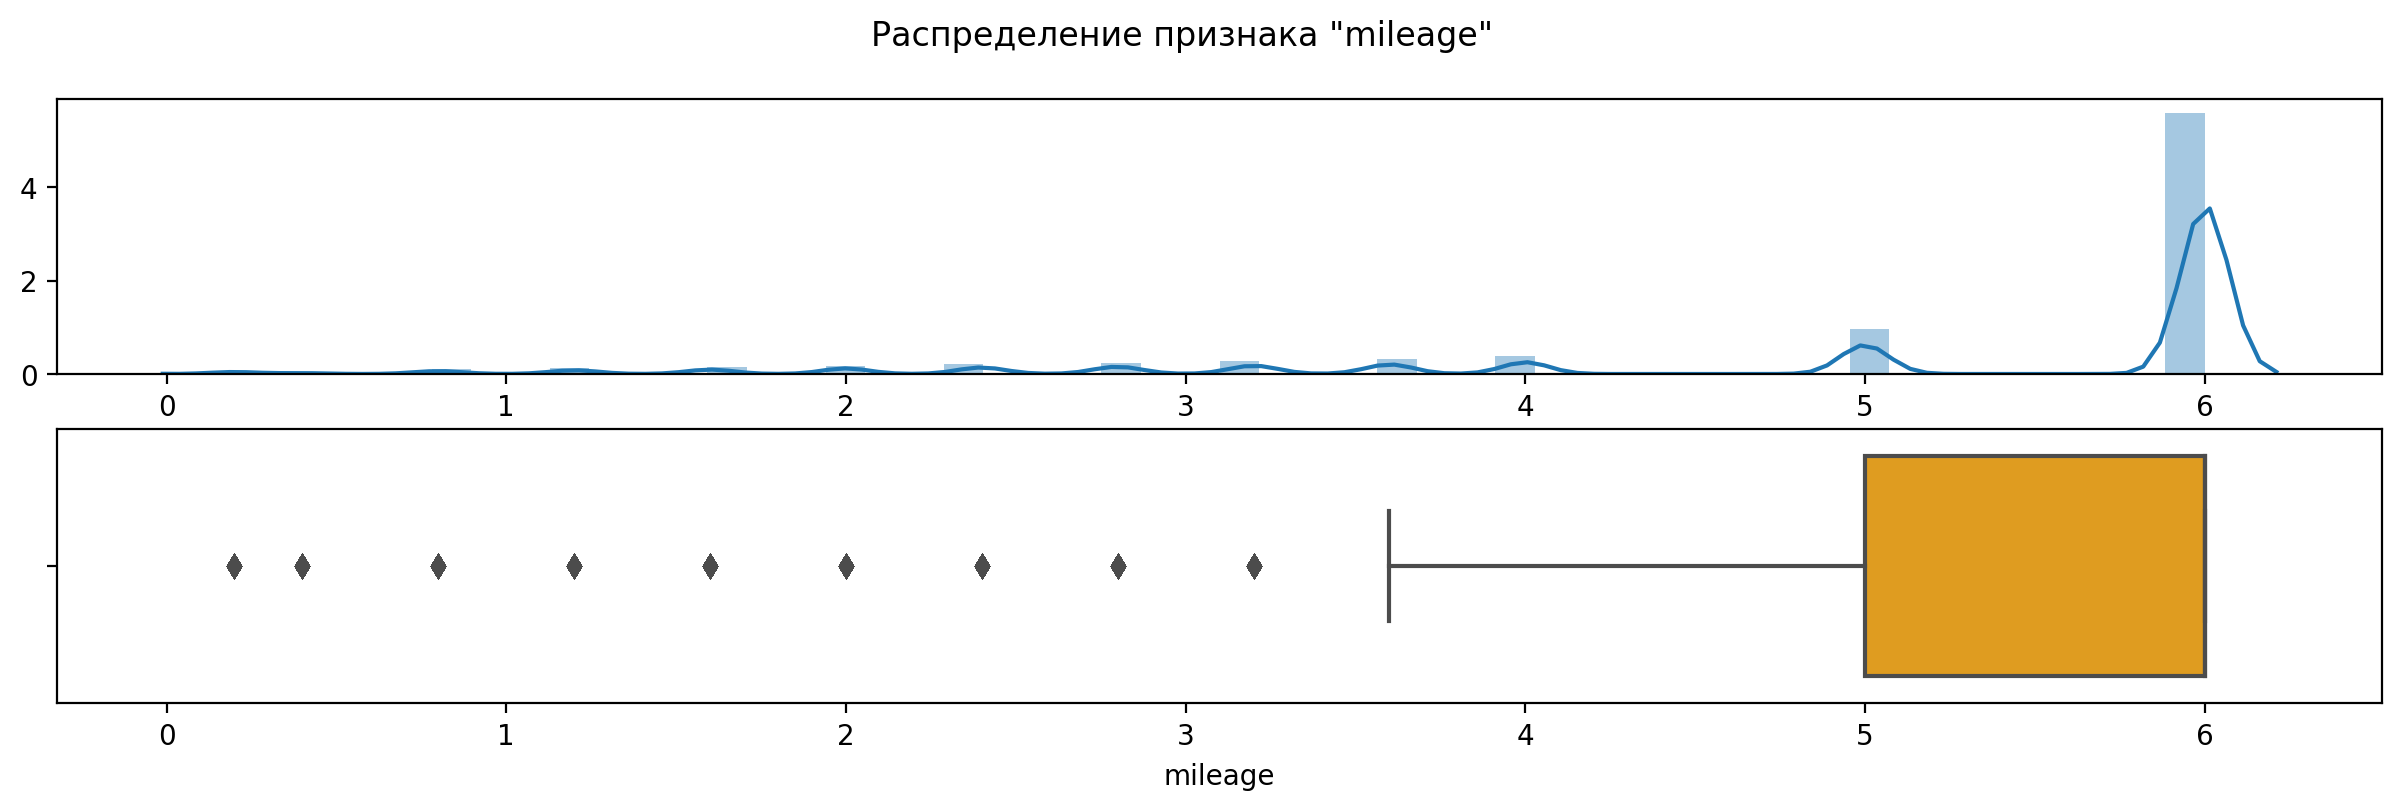

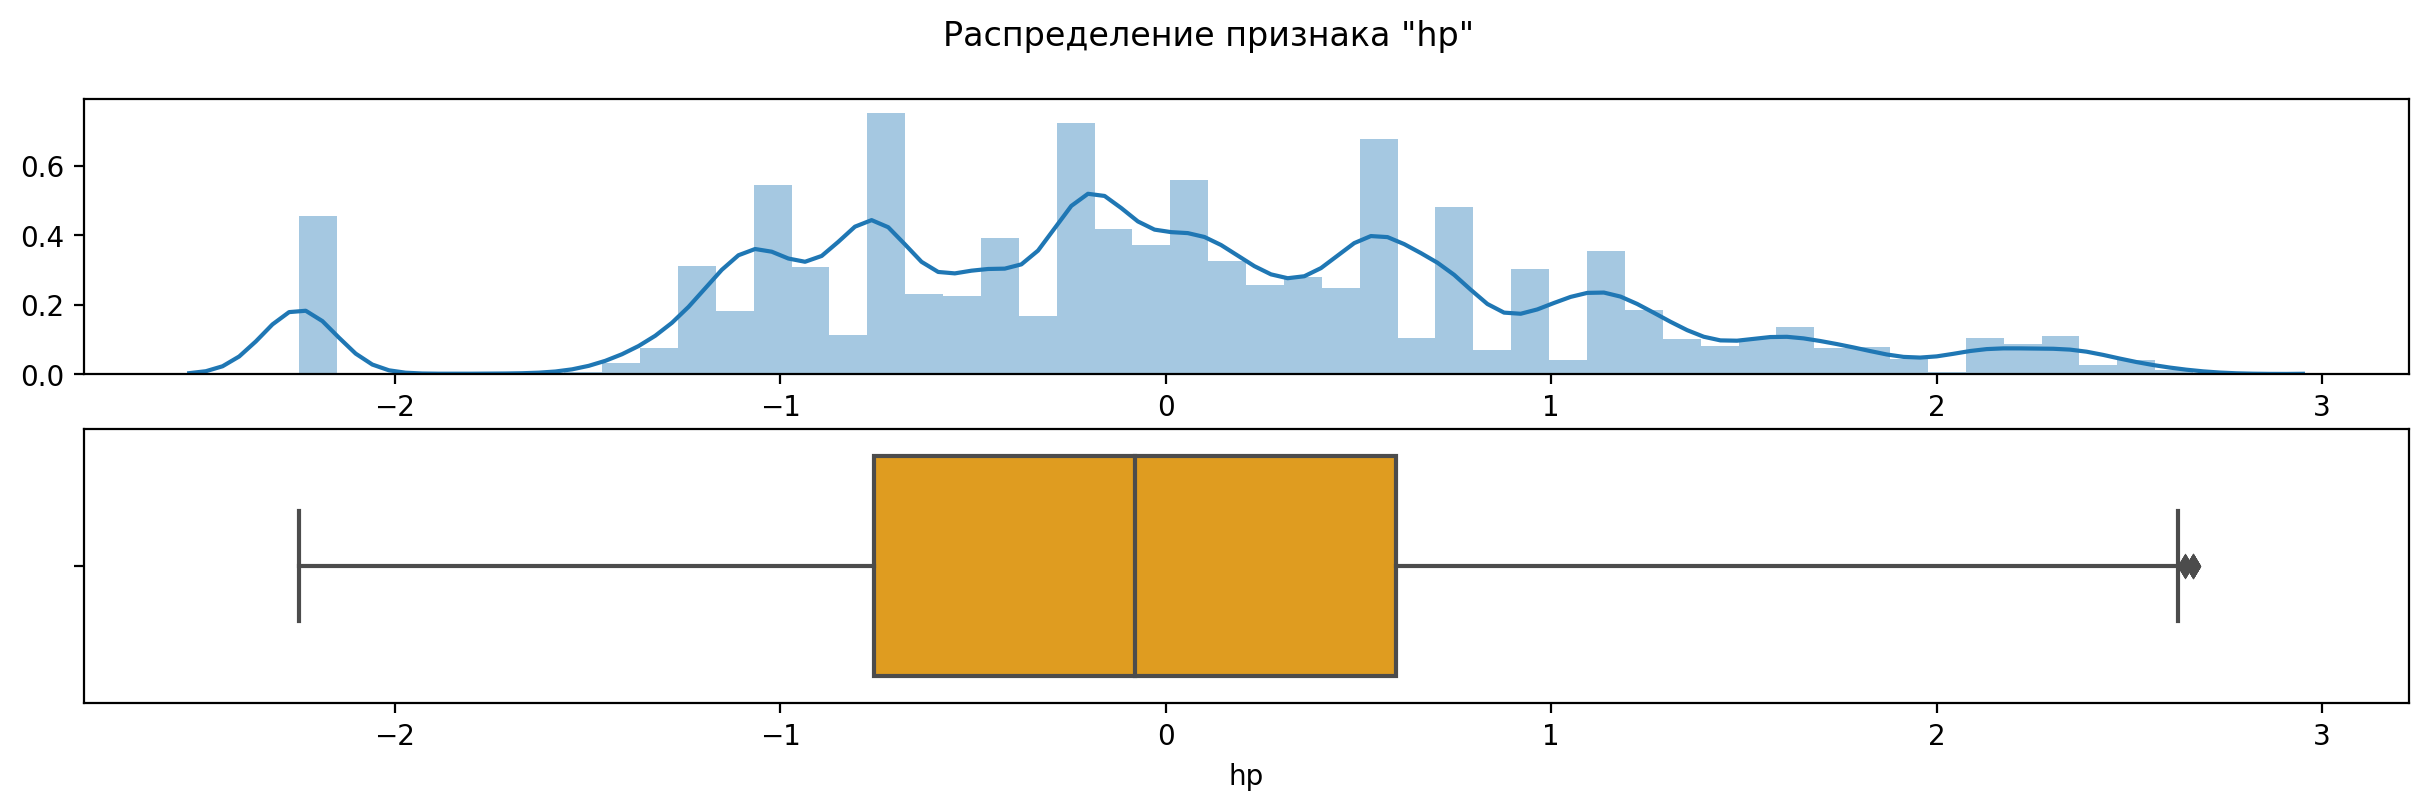

In [68]:
plot_dist_classic(x_train, ['mileage', 'hp'])

- `RobustScaler` как будто бы выставил оценки пробегам от меньшего к большему.
- Распределения выглядят очень похоже на то, какими они были до масштабирования.

Наконец, мы можем начать обучать модели.

---

### Обучение моделей

Мы будем использовать для обучения модель `LightGBM`, а метрикой качества будет **RMSE**. Вместе с ней мы обучим `CatBoost` и `XGBoost`. И всё это мы сравним по метрикам, полученным с помощью кросс-валидации.

In [69]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from timeit import default_timer as timer
from datetime import timedelta
from functools import partial
from toads.ml import train_model_cv

In [70]:
# RMSE
rmse = partial(mean_squared_error, squared=False)

У нас есть готовая функция `train_model_cv`, которая обучает любую модель на заданной выборке и выполняет **кросс-валидацию** в одно действие. Так мы сможем быть уверены, что модели не переучатся.

In [71]:
# Закрепим за переменной train функцию с обучением
train = partial(train_model_cv, x=x_train, y=y_train, scorer='neg_root_mean_squared_error', cv=4)

Объявим функцию, которая будет измерять всё, что нам может потребоваться на дальнейших этапах, включая **время обучения**.

In [72]:
def train_full(model, name: str):
    """Обучает модель. Измеряет время. Возвращает словарь с:
        - моделью
        - временем одного обучения
        - качеством модели на кросс-валидации
        - качеством на тестовой выборке.
    """
    global x_train, y_train, x_test, y_test
    
    # Измерим скорость непосредственно обучения.
    start = timer()
    model.fit(x_train, y_train)
    end = timer()
    fit_time = str(timedelta(seconds=end - start))
    
    # Измерим скорость предсказаний
    start = timer()
    test_preds =  model.predict(x_test)
    end = timer()
    predict_time = str(timedelta(seconds=end - start))
    
    # Запишем в словарь показатели
    return {'name': name,
            'model': model,
            'score_cv': train(model),
            'single_fit_time': fit_time,
            'score_test': rmse(y_test, test_preds),
            'predict_time': predict_time}

Приступим к созданию моделей.
- Мы не будем злоупотреблять гиперпараметрами, будем работать только со **скоростью обучения, глубиной деревьев, количеством моделей и типом бустинга**. Параметры будем подбирать с помощью **randomized search**: так у нас будет намёк на то, как оптимизировать скорость обучения (learning rate) и количество моделей (n_estimators) в бустинге.

In [73]:
from sklearn.model_selection import RandomizedSearchCV

# Запишем параметры, общие для всех RandomizedSearch
RMSESearch = partial(RandomizedSearchCV,
                     scoring='neg_root_mean_squared_error',
                     n_iter=10,
                     random_state=rstate)

In [74]:
# Создадим модель LGBM с лучшими параметрами
lgb = RMSESearch(LGBMRegressor(random_state=rstate),
                 {'learning_rate': np.arange(0.1, 0.6, 0.1),
                  'n_estimators': range(100, 300, 20),
                  'max_depth': range(1, 11)}).fit(x_train, y_train).best_estimator_

# Обучим, кросс-валидируем и запишем результаты в переменную
lgb_results = train_full(lgb, 'LightGBM')
lgb_results

{'name': 'LightGBM',
 'model': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=280, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 'score_cv': 1552.57459935152,
 'single_fit_time': '0:00:02.122342',
 'score_test': 1541.8356383397627,
 'predict_time': '0:00:00.231211'}

- LightGBM обучается и предсказывает исключительно быстро.
- И показывает неплохой результат: *1550* евро в среднем - ошибка, примерно равная *140000* ₽. И это если учесть, что метрика квадратичная и чувствительная ошибкам.

In [75]:
# XGBoost
xgb = RMSESearch(XGBRegressor(objective='reg:squarederror', random_state=rstate),
                 {'learning_rate': np.arange(0.1, 1.1, 0.1),
                  'n_estimators': range(100, 300, 20),
                  'max_depth': range(1, 11)}).fit(x_train, y_train).best_estimator_

xgb_results = train_full(xgb, 'XGBoost')
xgb_results

{'name': 'XGBoost',
 'model': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=140,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1),
 'score_cv': 1536.738639545064,
 'single_fit_time': '0:01:13.262087',
 'score_test': 1510.2539163189556,
 'predict_time': '0:00:01.085330'}

- Результаты превосходят LightGBM, но незначительно.
- А вот обучение происходит невероятно долго. Вопрос, допустима ли такая скорость обучения для заказчика.

In [76]:
# CatBoost
cbr = RMSESearch(CatBoostRegressor(random_state=rstate, verbose=False),
                 {'learning_rate': np.arange(0.1, 1.1, 0.1),
                  'n_estimators': range(100, 1000, 50),
                  'max_depth': range(1, 11)}).fit(x_train, y_train).best_estimator_

cbr_results = train_full(cbr, 'CatBoost')
cbr_results

{'name': 'CatBoost',
 'model': <catboost.core.CatBoostRegressor at 0x7f81ed471a10>,
 'score_cv': 1544.3704056943423,
 'single_fit_time': '0:00:05.343108',
 'score_test': 1518.926112169022,
 'predict_time': '0:00:00.010830'}

CatBoost без особых усилий оказывается лучше LightGBM по предсказаниям и намного быстрее, чем XGBoost. Уверенная модель-золотая середина.

### Вывод из обучения моделей:
- Мы обучили три модели, использующие градиентный бустинг: `LightGBM, XGBoost и CatBoost`.
- Для каждой модели мы:
    - Случайным поиском подобрали такие параметры, при которых ошибка будет минимальной.
    - Измерили качество предсказаний при кросс-валидации на учебной и на тестовой выборке.
    - Вычислили время, за которое производится обучение и предсказание.
    - Записали измерения в словари.

Теперь мы проведём анализ и выясним, какая из моделей больше подходит для нашей задачи.

---

## 3. Анализ моделей
***Заказчику важны качество, скорость предсказаний и скорость обучения***. Причём качество стоит на первом месте, а скорость обучения - на последнем. Представим, как может быть устроен процесс предсказания стоимости:
- В базе данных хранятся все данные об автомобилях.
- Модель, которую **мы** создадим, с определённой периодичностью обучается на всех данных. Например, раз в сутки. *(Чем чаще обновления, тем важнее **время обучения**, чтобы за этими обновлениями успевать)*.
- Клиент вводит данные о своей машине в приложение.
- Далее возможны два варианта:
    1. Приложение связывается с **сервером** и передаёт вектор признаков в модель.
        - В таком случае мы можем меньше беспокоиться за скорость предсказаний и использовать модель, которая предсказывает не слишком быстро, но на хорошем железе. Тем более, что мы предсказываем всего лишь одну строчку признаков.
    2. Приложение содержит в себе модель и предсказывает **локально** на устройстве пользователя.
        - Тогда важна не только скорость предсказания (неизвестно, на чём мы запускаем приложение), но и размер модели: меньше размер - лучше.
- Качество предсказаний важно в любом случае, чтобы предложить такую цену, чтобы нашёлся покупатель, готовый купить машину по этой цене.

Чтобы понять, какая модель лучше всего отвечает требованиям, мы объединим результаты наших обучений в таблицу и сравним их на графике.

In [77]:
# Таблица с результатами обучения
model_results = pd.DataFrame([lgb_results,
                              xgb_results,
                              cbr_results]).set_index('name').drop('model', axis=1)

# Переведём столбцы со временем в наносекунды
model_results.single_fit_time = pd.to_timedelta(model_results.single_fit_time).astype('int')
model_results.predict_time = pd.to_timedelta(model_results.predict_time).astype('int')

Мы дополнительно провели исследование, сериализуя модели с помощью `joblib` с максимальным сжатием и выяснили, какой размер имеют файлы с нашими моделями.

In [78]:
# Добавим размеры моделей в таблицу
model_results.loc[:, 'size_kb'] = [269, 2589, 314]

# Посмотрим, что получилось
model_results

,score_cv,single_fit_time,score_test,predict_time,size_kb
name,,,,,
LightGBM,1552.574599,2122342000,1541.835638,231211000,269
XGBoost,1536.738640,73262087000,1510.253916,1085330000,2589
CatBoost,1544.370406,5343108000,1518.926112,10830000,314


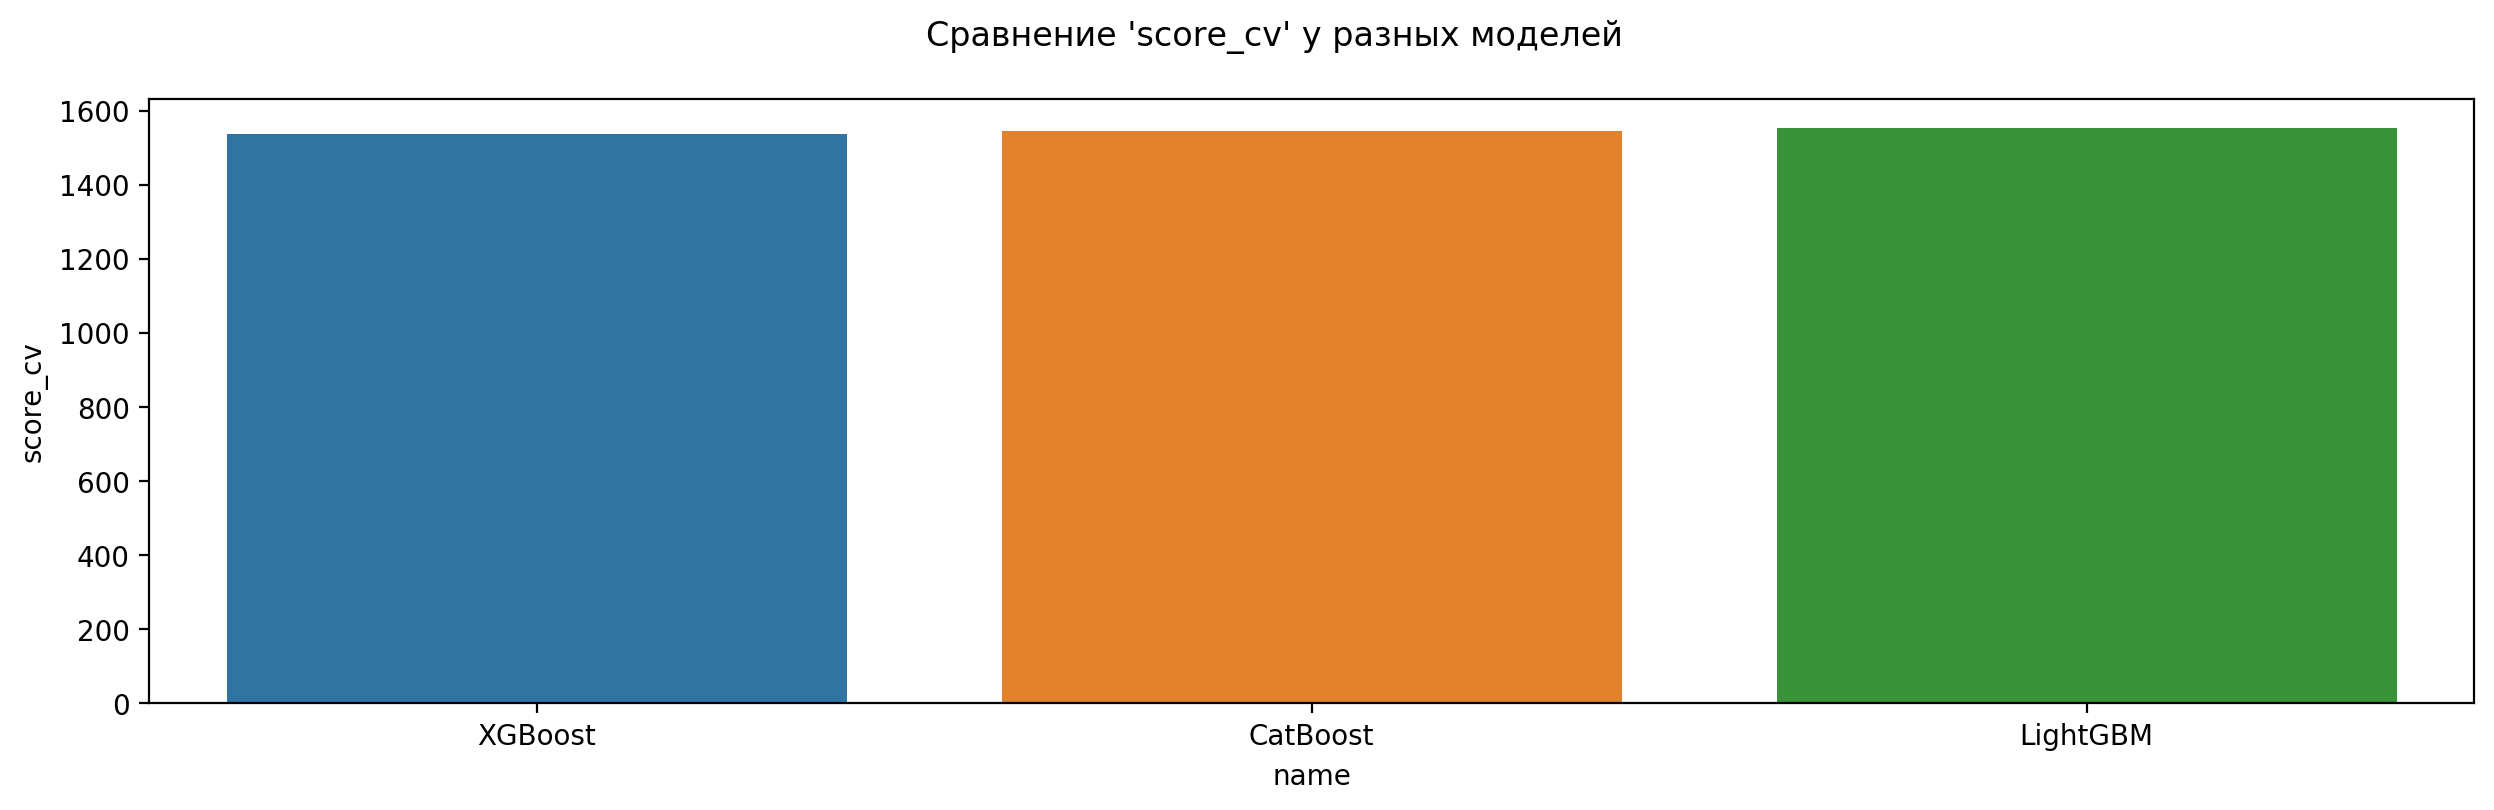

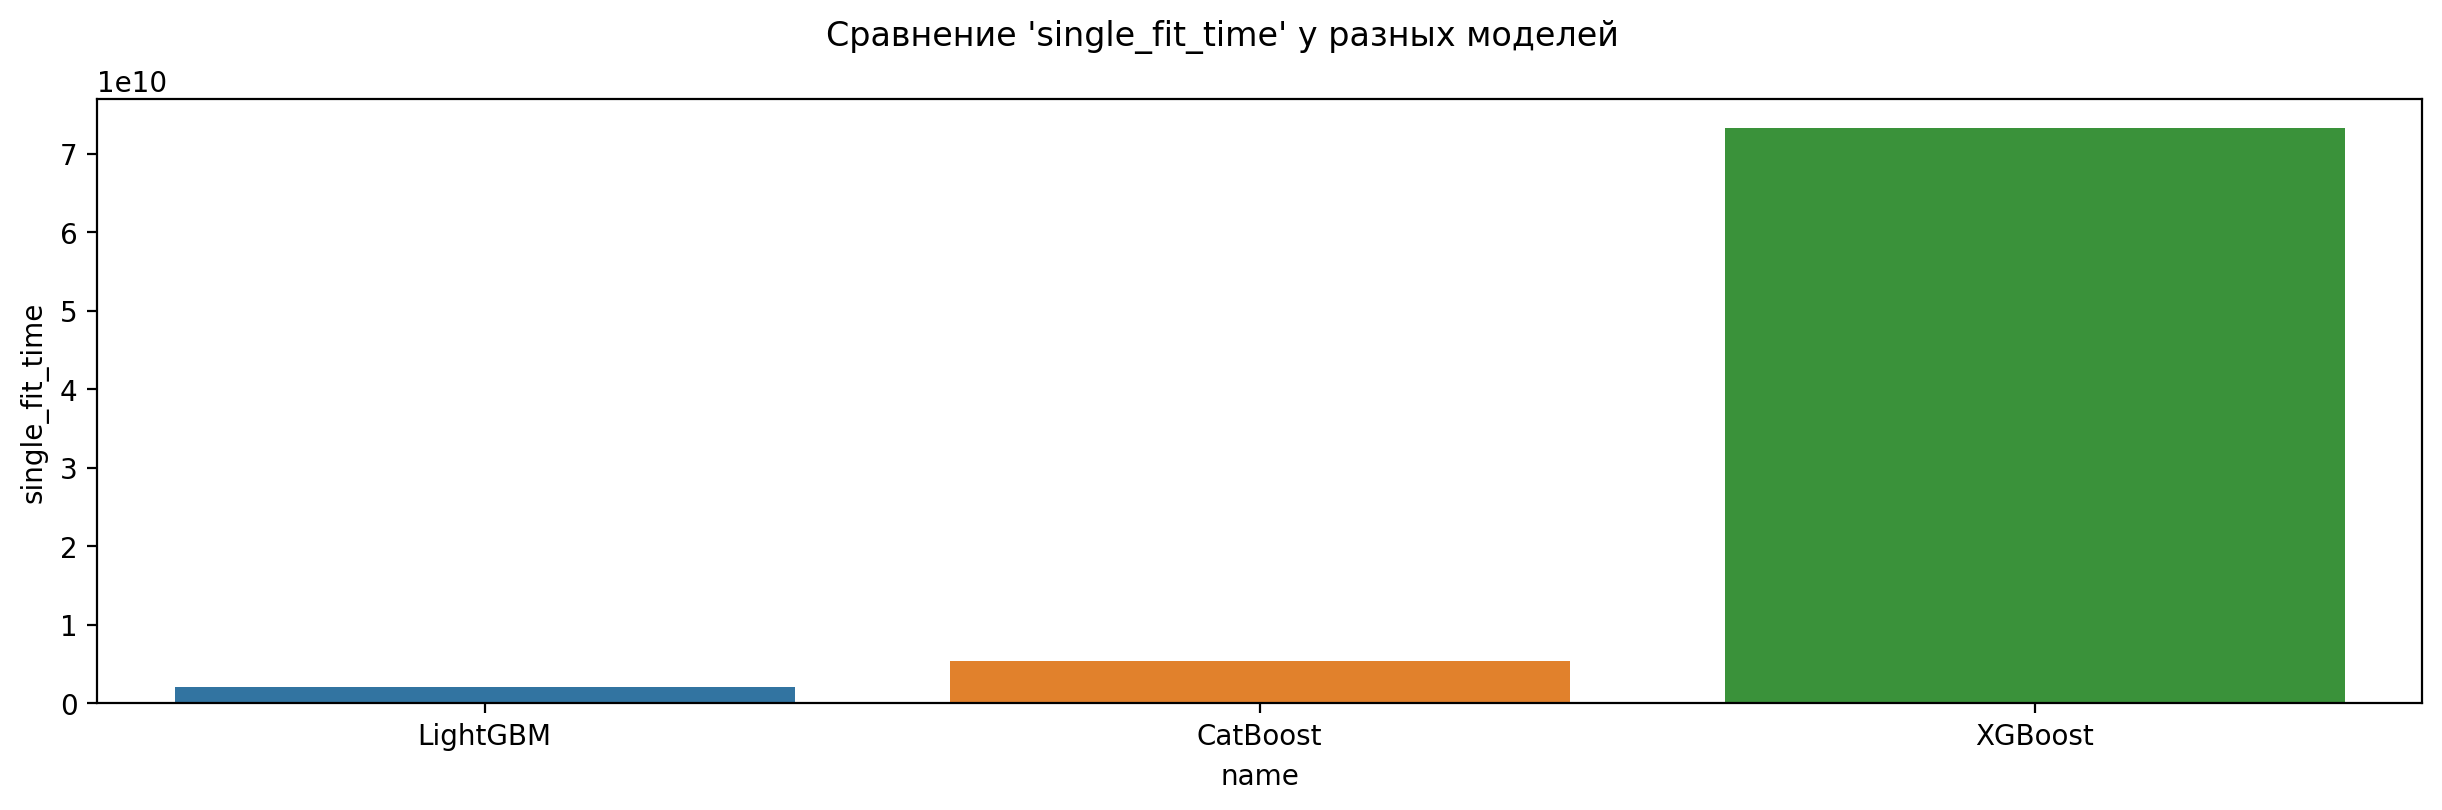

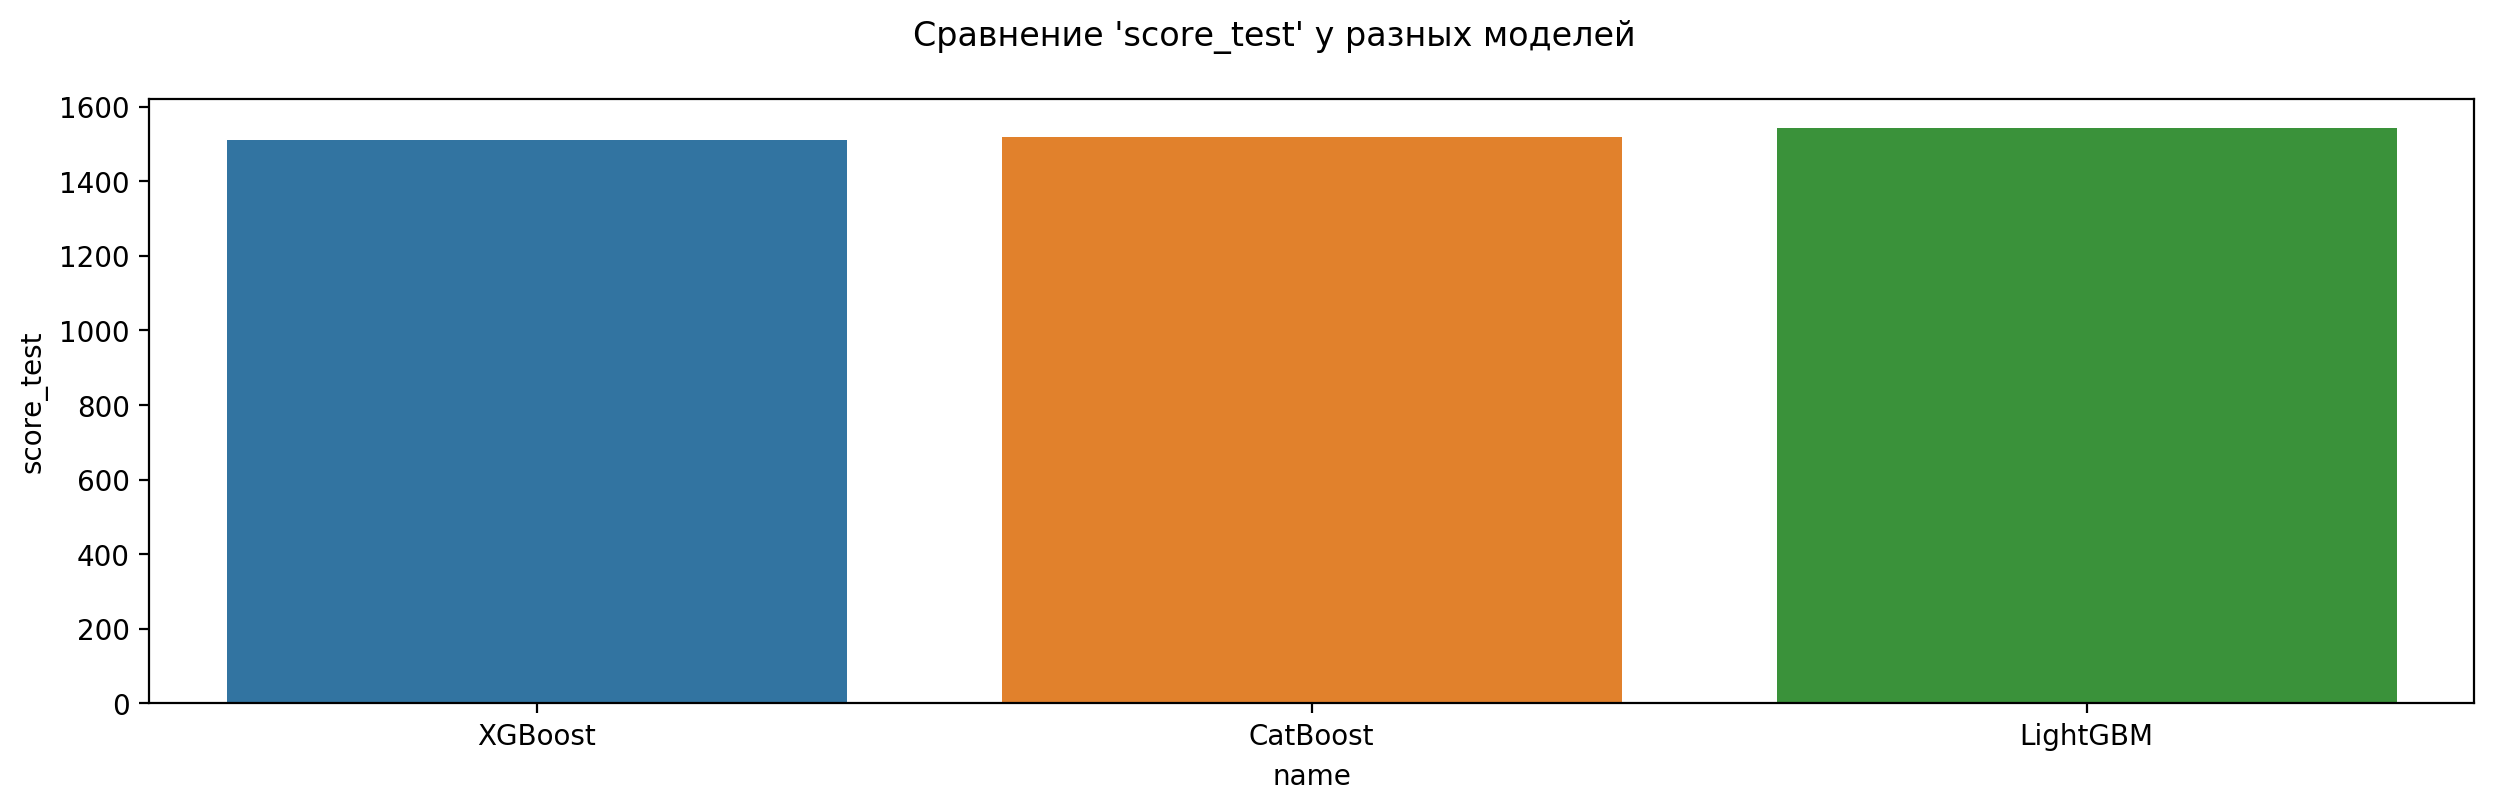

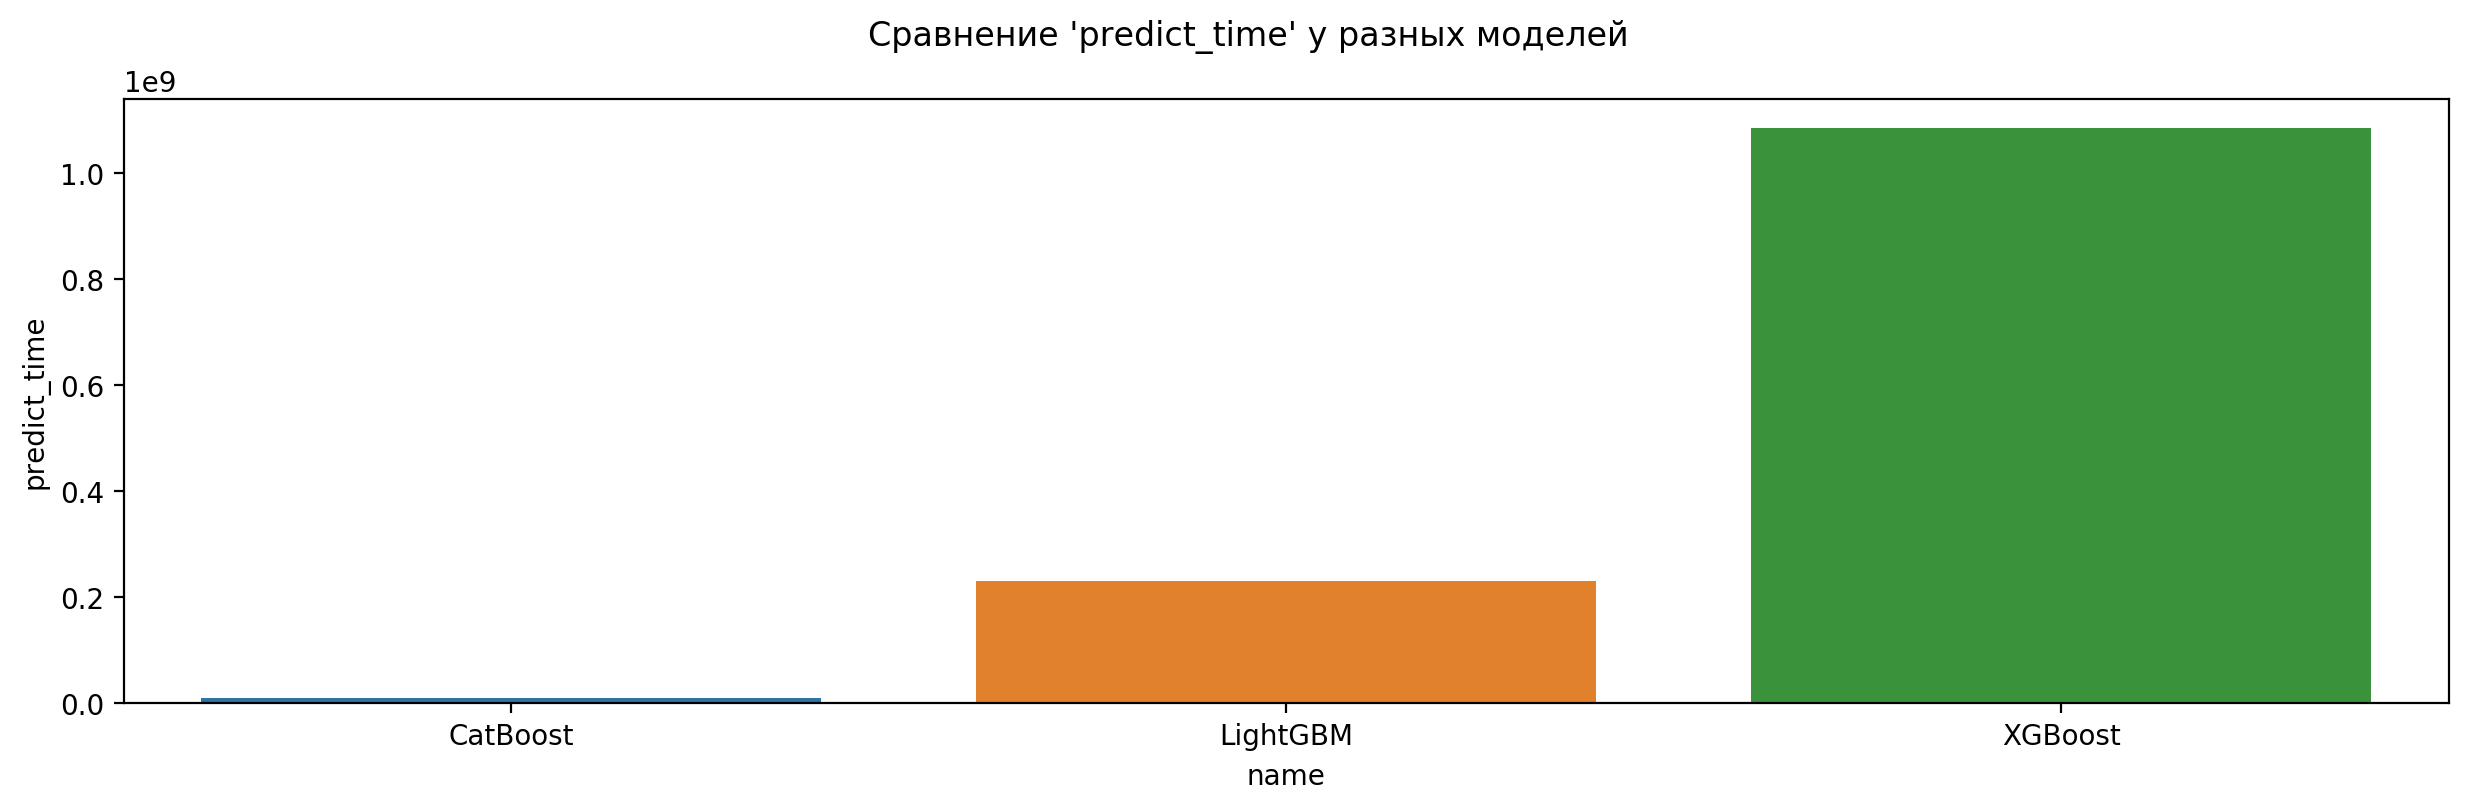

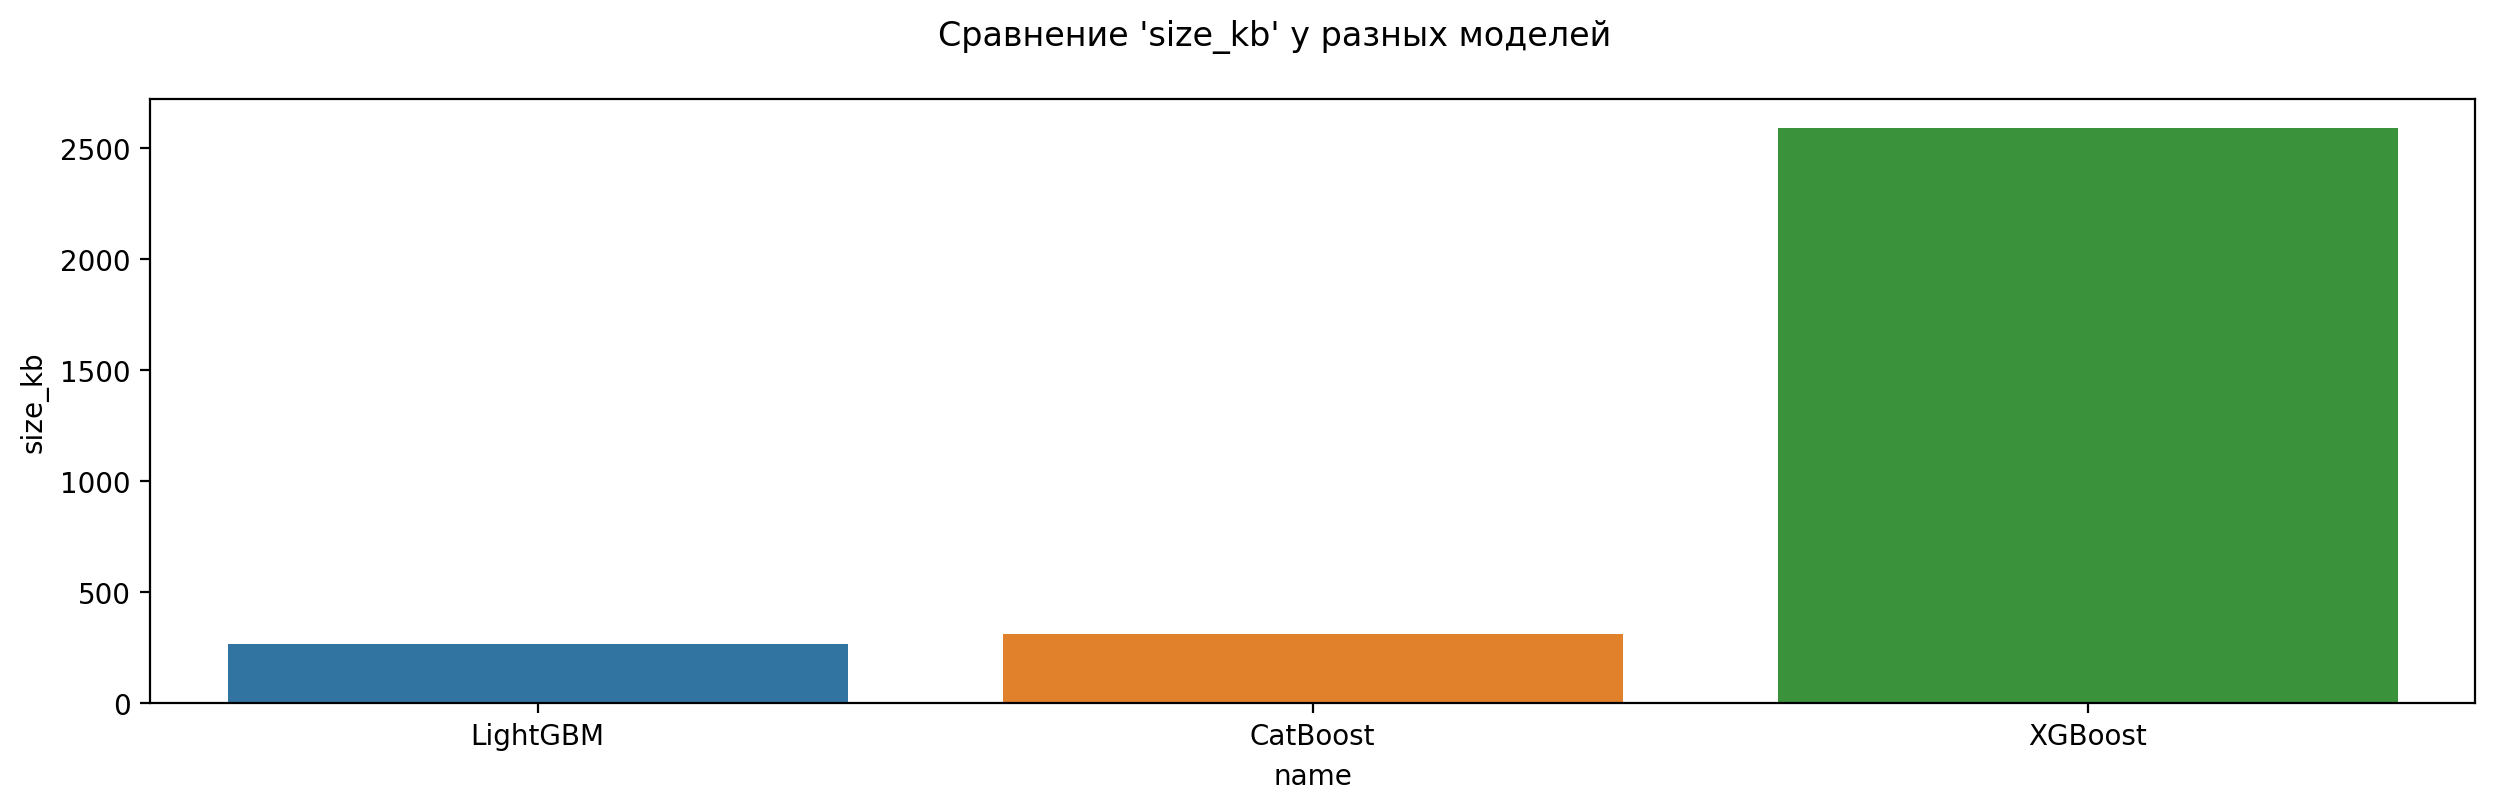

In [79]:
# Рисуем показатели моделей
for col in model_results.columns:
    with Image(st=f"Сравнение '{col}' у разных моделей"):
        sorted_models = model_results.sort_values(col)
        sns.barplot(x=sorted_models.index, y=sorted_models[col])
        Image.labels('')

In [80]:
# Посмотрим на лидеров и аутсайдеров в каждом зачёте в удобном представлении
pd.DataFrame({'best': model_results.idxmin(), 'worst': model_results.idxmax()})

,best,worst
score_cv,XGBoost,LightGBM
single_fit_time,LightGBM,XGBoost
score_test,XGBoost,LightGBM
predict_time,CatBoost,XGBoost
size_kb,LightGBM,XGBoost


Что мы можем сказать, исходя из графиков?
- **Качество предсказаний** при кросс-валидации и на тестовой выборке различается, но минимально. Самое лучшее качество даёт `XGBoost`.
- По **времени обучения** `LightGBM` нет равных: Соответственно, если у нас стоит задача быстро обучить модель, однозначно выбираем `LightGBM`. Возможно, что будет возможность обучать такую модель **в реальном времени** в тот момент, как только пользователь отправляет свои данные. Тогда можно будет добавить в приложение экран ожидания в стиле поиска билетов *Aviasales*. Но это сильно зависит от количества данных. Нам также потребуется **пайплайн с предобработкой**, чтобы избавляться от выбросов и пропусков на месте.
- По **скорости предсказаний** лидирует `CatBoost`. `LightGBM` не сильно от него отстаёт, поэтому такой разницей можно вполне пренебречь, если мы не планируем предсказать сразу огромное количество цен на машины. А мы всё-таки планируем много единичных действий.
- По **размеру файла** модели `LightGBM` и `CatBoost` примерно схожи, а вот `XGBoost` занимает почти в 10 раз больше места. Легковесные решения лучше подошли бы для мобильных приложений, даже несмотря на чуть меньшую точность, потому что их загрузка будет происходить **быстрее**.

### Вывод из анализа моделей
Мы сравнили показатели работы трёх моделей:
- LightGBM
- XGBoost
- CatBoost

Присвоим им места.

#### 1. LightGBM
**Наиболее выигрышной** моделью, по нашему мнению, будет LightGBM, поскольку она демонстрирует исключительную скорость обучения в сравнении с другими моделями и практически не проигрывает им в качестве и других параметрах. Если мы стремимся к скорости, LightGBM - наш выбор. И если мы можем выбрать одну единственную модель - это будет LightGBM.

#### 2. CatBoost
CatBoost в середине нашего рейтинга, но она заметно ближе к LightGBM по скорости работы, поэтому мы бы предложили исследовать возможность ускорения обучения CatBoost, чтобы получить хорошие предсказания за более короткое время, и тогда от неё будет смысл.

#### 3. XGBoost
XGBoost предсказывает наиболее точно, но требует гораздо больше ресурсов и времени для того, чтобы обучиться. И разница в точности минимальная. Если у нас нет необходимости обучать модель в момент запроса пользователя, то XGBoost можно рассмотреть в качестве модели, которая работает удалённо на мощном сервере и обучается с некоторой периодичностью.

Мы обучали модели, используя `RandomizedSearchCV`, поэтому важно отметить, что мы вряд ли достигли предельно возможного качества. ***Главное, мы выяснили, как ведут себя модели градиентного бустинга при черновой оптимизации***. И даже если модель не будет рекомендовать идеальную цену за автомобиль, мы можем рекомендовать ценовой диапазон, либо округлять рекомендуемую цену в стиле: "*Средняя цена за ваш автомобиль: ~5450 евро.*"

---

## 4. Общий вывод
Целью нашего проекта был поиск модели градиентного бустинга, которую можно встроить в приложение, и которая будет рекомендовать стоимость автомобиля в зависимости от его характеристик и других факторов.
- Мы изучили данные из базы объявлений о продаже автомобилей и определили набор действий, которые выполним на этапе предобработки данных.
- Выполнили предобработку данных, по возможности заполняя пропуски в данных и удаляя сомнительные строки, которые могут породить ошибки при обучении.
- Закодировали категориальные признаки при помощи методов One-Hot, Label Encoder, разделили данные на выборки для обучения и тестирования, затем количественные признаки отмасштабировали с помощью Standard Scaler и Robust Scaler.
- Обучили модели градиентного бустинга LightGBM, CatBoost и XGBoost при помощи случайной оптимизации гиперпараметров.
- Провели сравнительный анализ и оценили достоинства и недостатки моделей. Рассмотрели возможности использования каждой модели.
- Сделали вывод, что лучшей моделью для решения нашей задачи будет LightGBM, потому что она обеспечивает достойное качество предсказаний при времени обучения, которому нет равных.

---